In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Assignment/Data_Science/Group Project/Data /train.csv')
testset = pd.read_csv('/content/drive/MyDrive/Assignment/Data_Science/Group Project/Data /test.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset["Employment_Info_2"].nunique()

36

In [6]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
# discovering columns with missing values

empty_cols = [i for i in dataset.columns if dataset[i].isnull().any()]
empty_cols

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [8]:
# there can be 3 ways to repopulate missing values
# without considering outliers or exceptional cases

# the method being mean, median and mode

# mean and median for float values and integers - category 1
# mode is ideal for categorical data - category 2

In [9]:
# category 1

dataset['Employment_Info_1'].fillna(value=dataset['Employment_Info_1'].mean(), inplace=True)
dataset['Employment_Info_4'].fillna(value=dataset['Employment_Info_4'].mean(), inplace=True)
dataset['Employment_Info_6'].fillna(value=dataset['Employment_Info_6'].mean(), inplace=True)
dataset['Insurance_History_5'].fillna(value=dataset['Insurance_History_5'].mean(), inplace=True)

dataset['Family_Hist_2'].fillna(value=dataset['Family_Hist_2'].mean(), inplace=True)
dataset['Family_Hist_3'].fillna(value=dataset['Family_Hist_3'].mean(), inplace=True)
dataset['Family_Hist_4'].fillna(value=dataset['Family_Hist_4'].mean(), inplace=True)
dataset['Family_Hist_5'].fillna(value=dataset['Family_Hist_5'].mean(), inplace=True)



In [10]:
# category 2

dataset['Medical_History_1'].fillna(value=dataset['Medical_History_1'].mode()[0], inplace=True)
dataset['Medical_History_10'].fillna(value=dataset['Medical_History_10'].mode()[0], inplace=True)
dataset['Medical_History_15'].fillna(value=dataset['Medical_History_15'].mode()[0], inplace=True)
dataset['Medical_History_24'].fillna(value=dataset['Medical_History_24'].mode()[0], inplace=True)
dataset['Medical_History_32'].fillna(value=dataset['Medical_History_32'].mode()[0], inplace=True)


In [11]:
# studying multicollinearity can help us discard similar variables

# the technique that we shall use to solve multi-collinearity is Variance Inflation Factor (VIF)

# we shall derive a table while calculating the VIF for each feature
# features with similar VIF are highly correlated



for col in dataset.columns:
  print(col, dataset[col].isnull().sum())

Id 0
Product_Info_1 0
Product_Info_2 0
Product_Info_3 0
Product_Info_4 0
Product_Info_5 0
Product_Info_6 0
Product_Info_7 0
Ins_Age 0
Ht 0
Wt 0
BMI 0
Employment_Info_1 0
Employment_Info_2 0
Employment_Info_3 0
Employment_Info_4 0
Employment_Info_5 0
Employment_Info_6 0
InsuredInfo_1 0
InsuredInfo_2 0
InsuredInfo_3 0
InsuredInfo_4 0
InsuredInfo_5 0
InsuredInfo_6 0
InsuredInfo_7 0
Insurance_History_1 0
Insurance_History_2 0
Insurance_History_3 0
Insurance_History_4 0
Insurance_History_5 0
Insurance_History_7 0
Insurance_History_8 0
Insurance_History_9 0
Family_Hist_1 0
Family_Hist_2 0
Family_Hist_3 0
Family_Hist_4 0
Family_Hist_5 0
Medical_History_1 0
Medical_History_2 0
Medical_History_3 0
Medical_History_4 0
Medical_History_5 0
Medical_History_6 0
Medical_History_7 0
Medical_History_8 0
Medical_History_9 0
Medical_History_10 0
Medical_History_11 0
Medical_History_12 0
Medical_History_13 0
Medical_History_14 0
Medical_History_15 0
Medical_History_16 0
Medical_History_17 0
Medical_Histor

In [12]:
print(dataset.corr())


                          Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                  1.000000       -0.002870       -0.001869       -0.002914   
Product_Info_1     -0.002870        1.000000        0.027573        0.059829   
Product_Info_3     -0.001869        0.027573        1.000000        0.048775   
Product_Info_4     -0.002914        0.059829        0.048775        1.000000   
Product_Info_5     -0.004195        0.069720        0.025419        0.040433   
...                      ...             ...             ...             ...   
Medical_Keyword_45 -0.000286       -0.006719       -0.053305       -0.019914   
Medical_Keyword_46  0.002684       -0.010638       -0.001538       -0.047318   
Medical_Keyword_47  0.001199        0.004402       -0.017001       -0.021974   
Medical_Keyword_48 -0.001122       -0.008469        0.045862       -0.030896   
Response            0.000462        0.014692       -0.067432        0.202434   

                    Product_Info_5  Pro

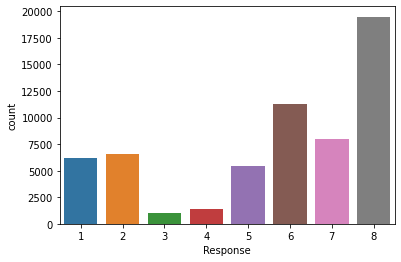

In [13]:
sns.countplot(x=dataset['Response']);

In [14]:
dataset['Response'].value_counts()
dataset.drop('Id',axis=1,inplace=True)

In [15]:
dataset.drop('Product_Info_2',axis=1,inplace=True)

In [16]:
columns =  [col for col in dataset.columns]
columns
columns.remove("Response")

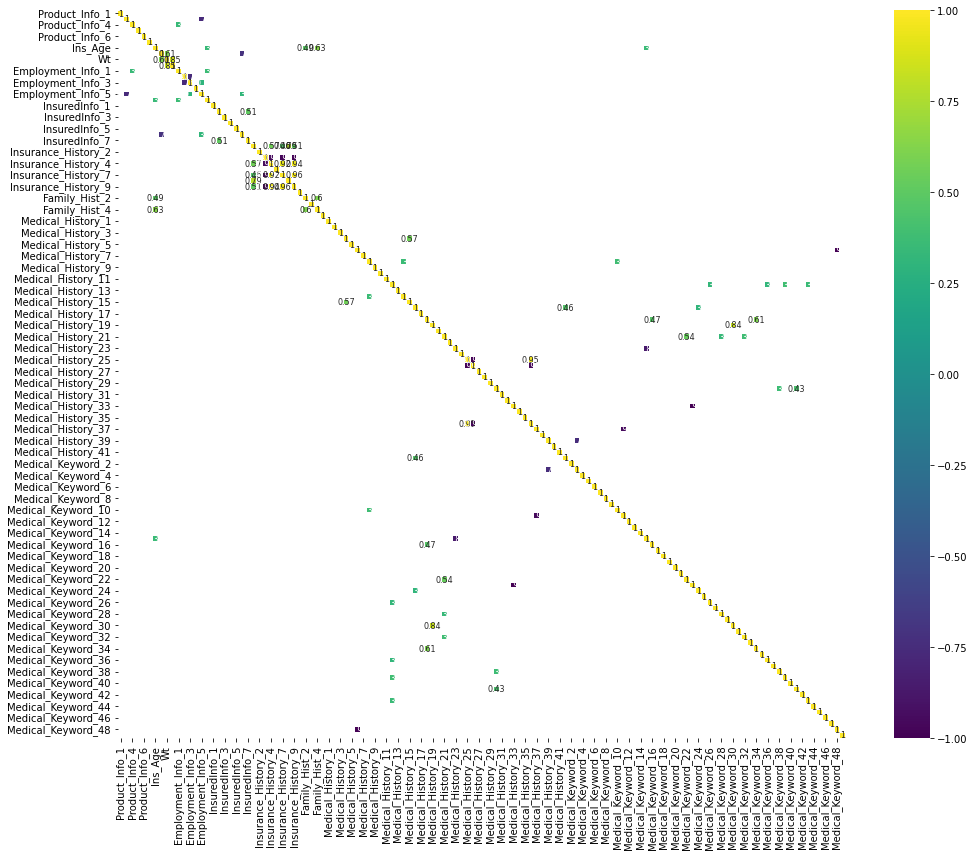

In [17]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [18]:
corr

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,...,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,...,-0.039359,-0.000005,-0.036560,0.034787,0.002696,-0.053305,-0.001538,-0.017001,0.045862,-0.067432
Product_Info_4,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,-0.129369,...,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Product_Info_5,0.069720,0.025419,0.040433,1.000000,-0.045840,0.019435,0.006543,0.054495,0.022393,-0.005165,...,-0.008326,0.011878,-0.005644,0.001135,-0.004944,-0.002885,-0.005534,-0.000320,0.004904,-0.001486
Product_Info_6,-0.078684,-0.018855,-0.089075,-0.045840,1.000000,-0.015553,-0.030691,-0.032327,0.014683,0.039228,...,0.017292,-0.009853,0.009682,-0.009387,-0.000026,-0.002870,0.002609,-0.009493,-0.003590,-0.030576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,-0.006719,-0.053305,-0.019914,-0.002885,-0.002870,0.002267,0.043924,-0.062366,-0.027579,0.006493,...,0.014192,-0.000252,0.033351,-0.006628,-0.000201,1.000000,0.003317,0.002923,0.017043,0.004852
Medical_Keyword_46,-0.010638,-0.001538,-0.047318,-0.005534,0.002609,0.008825,0.114839,0.012234,0.073164,0.084485,...,0.012907,0.012757,0.024699,0.022474,0.013181,0.003317,1.000000,0.026243,0.061895,-0.054693
Medical_Keyword_47,0.004402,-0.017001,-0.021974,-0.000320,-0.009493,0.014242,0.062636,-0.012682,0.016217,0.029526,...,0.021684,0.017060,0.046946,0.021482,0.021066,0.002923,0.026243,1.000000,0.044397,-0.060104
Medical_Keyword_48,-0.008469,0.045862,-0.030896,0.004904,-0.003590,0.031756,0.138007,0.102564,0.235822,0.222586,...,0.040558,0.017451,0.067131,0.062229,0.016858,0.017043,0.061895,0.044397,1.000000,-0.159557


In [ ]:
#columns are barely multicollinear so we can't drop the columns

Column:  Product_Info_1


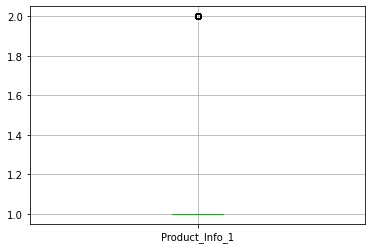

count    59381.000000
mean         1.026355
std          0.160191
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Product_Info_1, dtype: float64
Skewness:  5.913710040075982


Column:  Product_Info_3


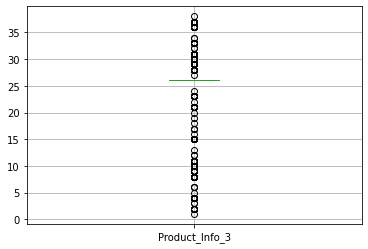

count    59381.000000
mean        24.415655
std          5.072885
min          1.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         38.000000
Name: Product_Info_3, dtype: float64
Skewness:  -2.3762321250568403


Column:  Product_Info_4


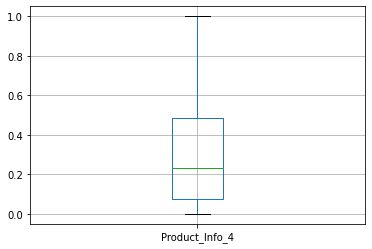

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64
Skewness:  1.2212725798546873


Column:  Product_Info_5


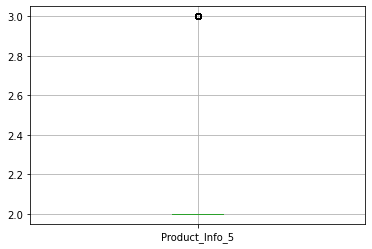

count    59381.000000
mean         2.006955
std          0.083107
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Product_Info_5, dtype: float64
Skewness:  11.865655390570558


Column:  Product_Info_6


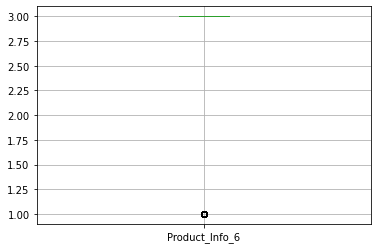

count    59381.000000
mean         2.673599
std          0.739103
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64
Skewness:  -1.8228096094843784


Column:  Product_Info_7


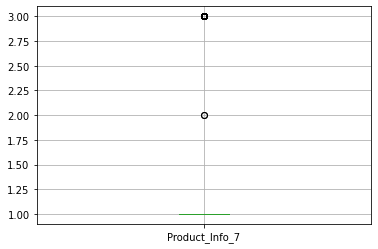

count    59381.000000
mean         1.043583
std          0.291949
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Product_Info_7, dtype: float64
Skewness:  6.550872454080122


Column:  Ins_Age


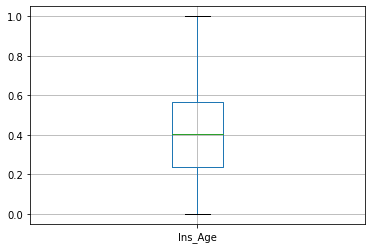

count    59381.000000
mean         0.405567
std          0.197190
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64
Skewness:  0.021995674311029476


Column:  Ht


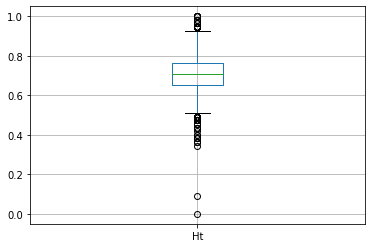

count    59381.000000
mean         0.707283
std          0.074239
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64
Skewness:  -0.08671154551855319


Column:  Wt


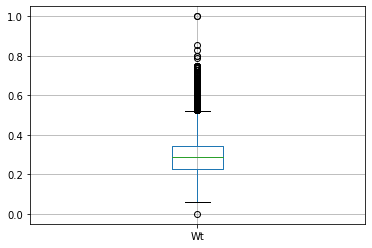

count    59381.000000
mean         0.292587
std          0.089037
min          0.000000
25%          0.225941
50%          0.288703
75%          0.345188
max          1.000000
Name: Wt, dtype: float64
Skewness:  0.6940309063501784


Column:  BMI


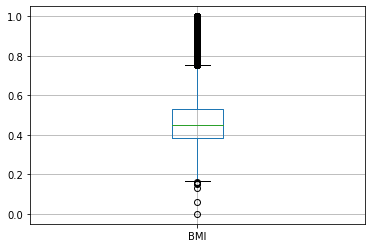

count    59381.000000
mean         0.469462
std          0.122213
min          0.000000
25%          0.385517
50%          0.451349
75%          0.532858
max          1.000000
Name: BMI, dtype: float64
Skewness:  0.944260717685289


Column:  Employment_Info_1


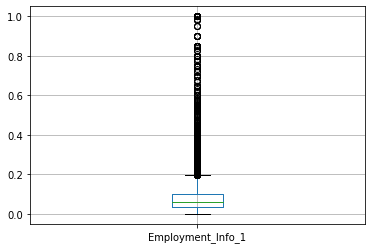

count    59381.000000
mean         0.077582
std          0.082334
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64
Skewness:  4.709304583826976


Column:  Employment_Info_2


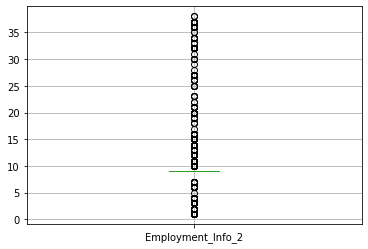

count    59381.000000
mean         8.641821
std          4.227082
min          1.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         38.000000
Name: Employment_Info_2, dtype: float64
Skewness:  0.5634913999800427


Column:  Employment_Info_3


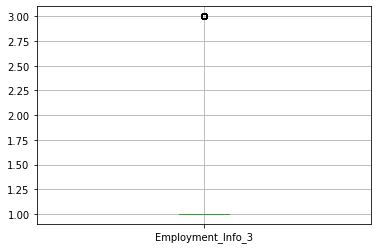

count    59381.000000
mean         1.300904
std          0.715034
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Employment_Info_3, dtype: float64
Skewness:  1.9554847970457538


Column:  Employment_Info_4


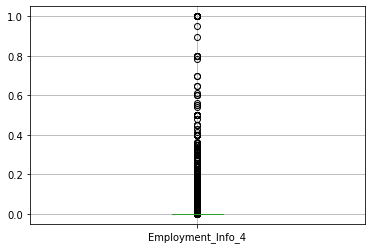

count    59381.000000
mean         0.006283
std          0.030887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64
Skewness:  16.44711715934277


Column:  Employment_Info_5


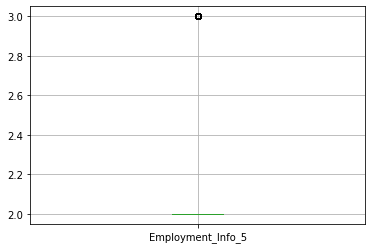

count    59381.000000
mean         2.142958
std          0.350033
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Employment_Info_5, dtype: float64
Skewness:  2.0401144343150253


Column:  Employment_Info_6


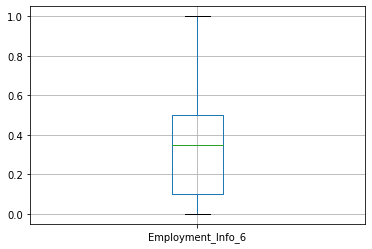

count    59381.000000
mean         0.361469
std          0.315993
min          0.000000
25%          0.100000
50%          0.350000
75%          0.500000
max          1.000000
Name: Employment_Info_6, dtype: float64
Skewness:  0.8703716496406719


Column:  InsuredInfo_1


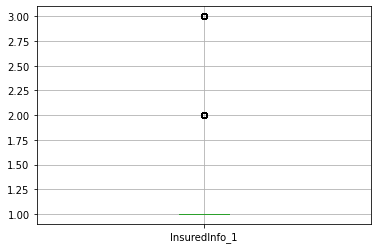

count    59381.000000
mean         1.209326
std          0.417939
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64
Skewness:  1.6157591587674176


Column:  InsuredInfo_2


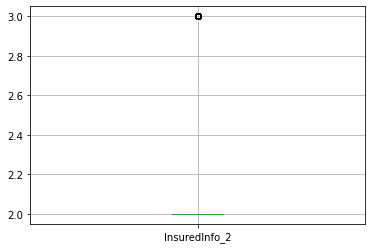

count    59381.000000
mean         2.007427
std          0.085858
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: InsuredInfo_2, dtype: float64
Skewness:  11.474533875946808


Column:  InsuredInfo_3


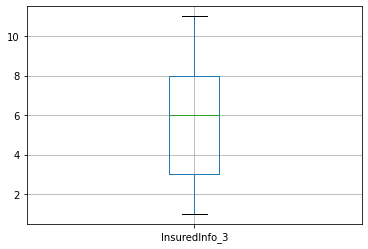

count    59381.000000
mean         5.835840
std          2.674536
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10829206979812836


Column:  InsuredInfo_4


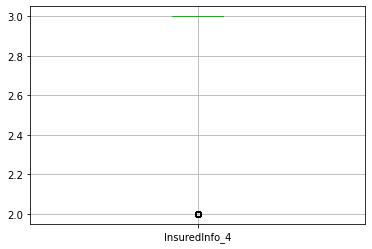

count    59381.000000
mean         2.883666
std          0.320627
min          2.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.3933060224896985


Column:  InsuredInfo_5


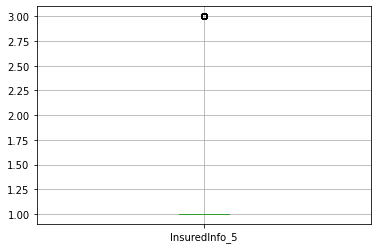

count    59381.000000
mean         1.027180
std          0.231566
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_5, dtype: float64
Skewness:  8.402365629626951


Column:  InsuredInfo_6


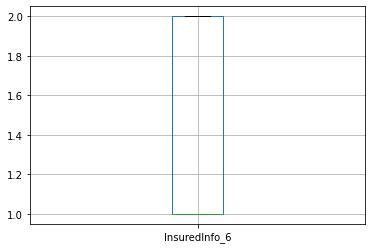

count    59381.000000
mean         1.409188
std          0.491688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: InsuredInfo_6, dtype: float64
Skewness:  0.36940051332325


Column:  InsuredInfo_7


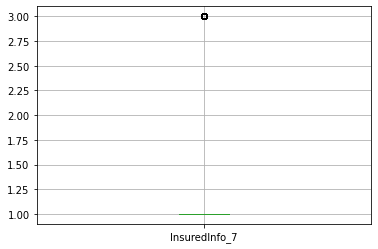

count    59381.000000
mean         1.038531
std          0.274915
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_7, dtype: float64
Skewness:  6.99489701982219


Column:  Insurance_History_1


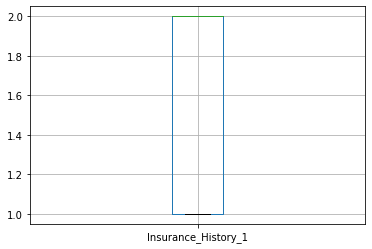

count    59381.000000
mean         1.727606
std          0.445195
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64
Skewness:  -1.0225367086751107


Column:  Insurance_History_2


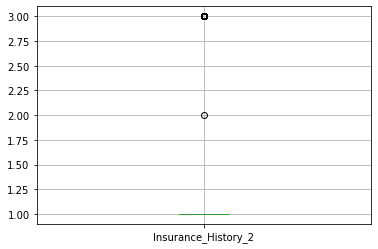

count    59381.000000
mean         1.055792
std          0.329328
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Insurance_History_2, dtype: float64
Skewness:  5.733901412165716


Column:  Insurance_History_3


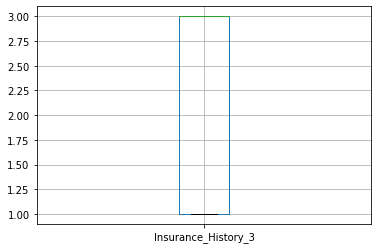

count    59381.000000
mean         2.146983
std          0.989139
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2972014102879703


Column:  Insurance_History_4


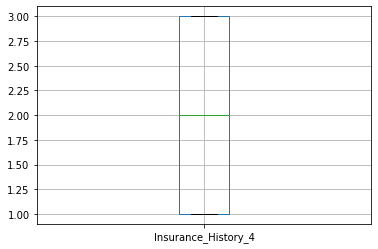

count    59381.000000
mean         1.958707
std          0.945739
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_4, dtype: float64
Skewness:  0.0822549371838283


Column:  Insurance_History_5


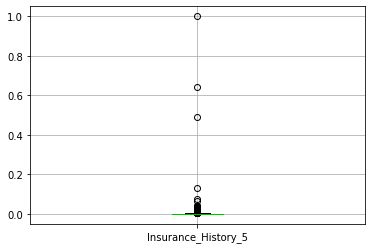

count    59381.000000
mean         0.001733
std          0.005551
min          0.000000
25%          0.000667
50%          0.001733
75%          0.001733
max          1.000000
Name: Insurance_History_5, dtype: float64
Skewness:  135.64482927683792


Column:  Insurance_History_7


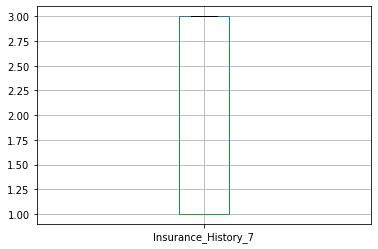

count    59381.000000
mean         1.901989
std          0.971223
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Insurance_History_7, dtype: float64
Skewness:  0.19679415616574578


Column:  Insurance_History_8


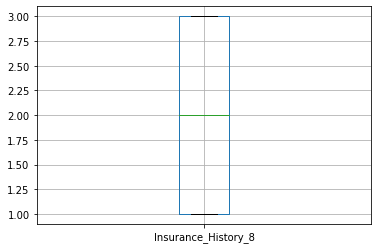

count    59381.000000
mean         2.048484
std          0.755149
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_8, dtype: float64
Skewness:  -0.08028808706123916


Column:  Insurance_History_9


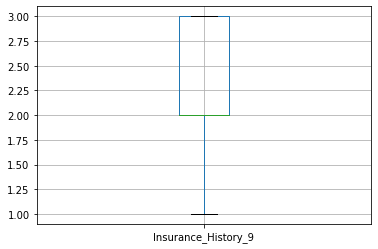

count    59381.000000
mean         2.419360
std          0.509577
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_9, dtype: float64
Skewness:  0.14308556984823534


Column:  Family_Hist_1


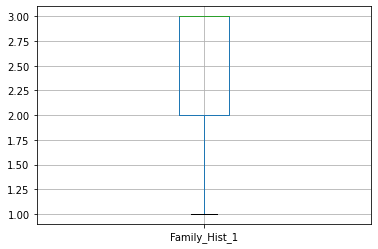

count    59381.000000
mean         2.686230
std          0.483159
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0418239409439525


Column:  Family_Hist_2


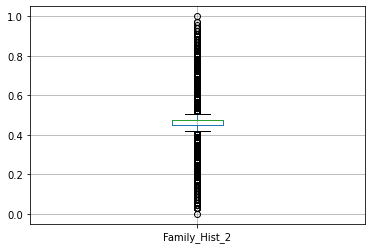

count    59381.000000
mean         0.474550
std          0.111464
min          0.000000
25%          0.449275
50%          0.474550
75%          0.474550
max          1.000000
Name: Family_Hist_2, dtype: float64
Skewness:  0.29485711424018335


Column:  Family_Hist_3


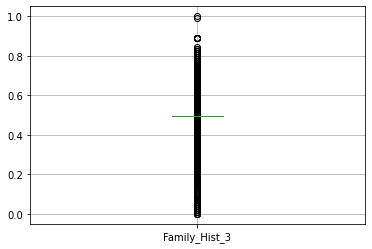

count    59381.000000
mean         0.497737
std          0.091214
min          0.000000
25%          0.497737
50%          0.497737
75%          0.497737
max          1.000000
Name: Family_Hist_3, dtype: float64
Skewness:  -0.8734219423730446


Column:  Family_Hist_4


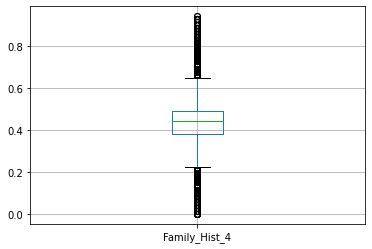

count    59381.000000
mean         0.444890
std          0.134119
min          0.000000
25%          0.380282
50%          0.444890
75%          0.492958
max          0.943662
Name: Family_Hist_4, dtype: float64
Skewness:  0.2516524016373548


Column:  Family_Hist_5


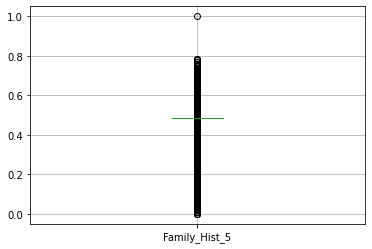

count    59381.000000
mean         0.484635
std          0.070277
min          0.000000
25%          0.484635
50%          0.484635
75%          0.484635
max          1.000000
Name: Family_Hist_5, dtype: float64
Skewness:  -1.3391441846489476


Column:  Medical_History_1


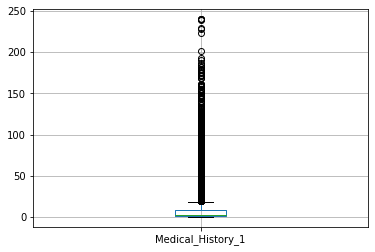

count    59381.000000
mean         6.919974
std         12.267196
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        240.000000
Name: Medical_History_1, dtype: float64
Skewness:  5.967319058220132


Column:  Medical_History_2


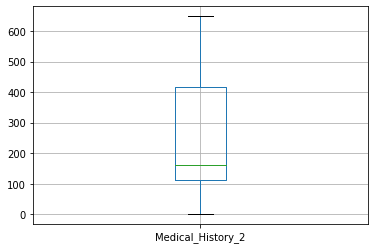

count    59381.000000
mean       253.987100
std        178.621154
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64
Skewness:  0.5939859106926527


Column:  Medical_History_3


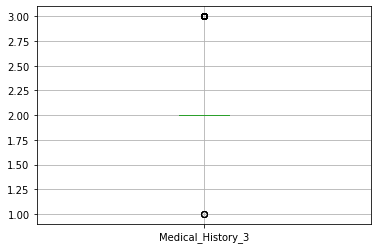

count    59381.000000
mean         2.102171
std          0.303098
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_3, dtype: float64
Skewness:  2.6198459094735047


Column:  Medical_History_4


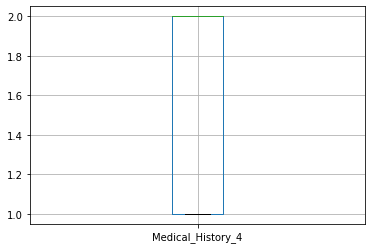

count    59381.000000
mean         1.654873
std          0.475414
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_4, dtype: float64
Skewness:  -0.6515503098011224


Column:  Medical_History_5


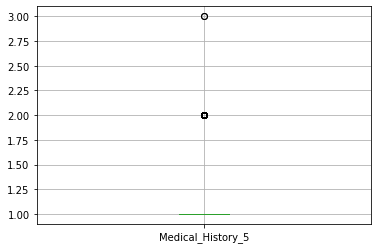

count    59381.000000
mean         1.007359
std          0.085864
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_5, dtype: float64
Skewness:  11.687375704053036


Column:  Medical_History_6


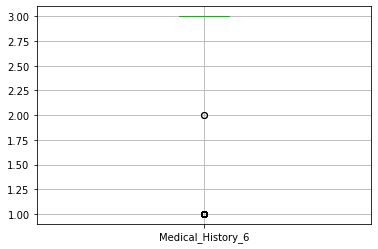

count    59381.000000
mean         2.889897
std          0.456128
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_6, dtype: float64
Skewness:  -3.9017828664374794


Column:  Medical_History_7


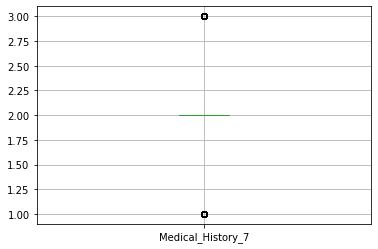

count    59381.000000
mean         2.012277
std          0.172360
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_7, dtype: float64
Skewness:  2.1836557151380105


Column:  Medical_History_8


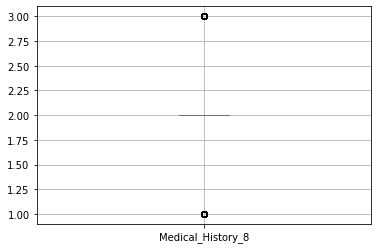

count    59381.000000
mean         2.044088
std          0.291353
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_8, dtype: float64
Skewness:  1.3252768886036914


Column:  Medical_History_9


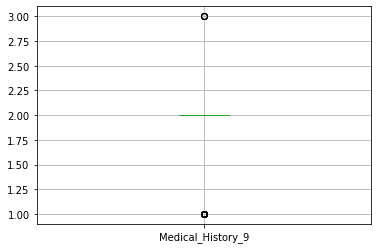

count    59381.000000
mean         1.769943
std          0.421032
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_9, dtype: float64
Skewness:  -1.2801145207240956


Column:  Medical_History_10


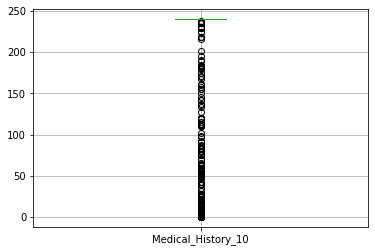

count    59381.000000
mean       239.072481
std         14.127452
min          0.000000
25%        240.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: Medical_History_10, dtype: float64
Skewness:  -15.742163245569728


Column:  Medical_History_11


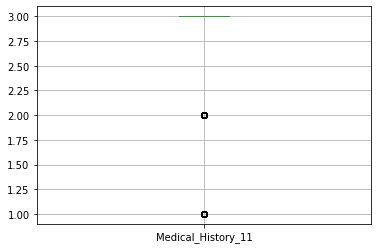

count    59381.000000
mean         2.993836
std          0.095340
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_11, dtype: float64
Skewness:  -17.17939866437908


Column:  Medical_History_12


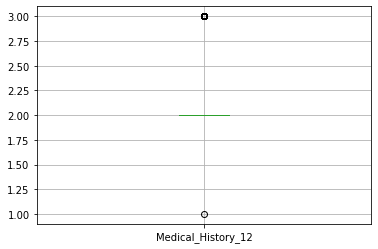

count    59381.000000
mean         2.056601
std          0.231153
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_12, dtype: float64
Skewness:  3.83366834208999


Column:  Medical_History_13


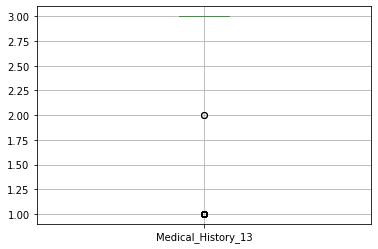

count    59381.000000
mean         2.768141
std          0.640259
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_13, dtype: float64
Skewness:  -2.3994512621755315


Column:  Medical_History_14


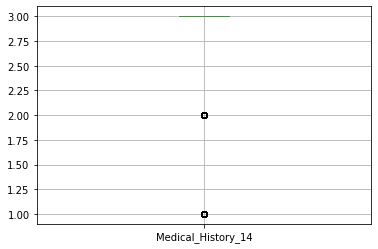

count    59381.000000
mean         2.968542
std          0.197715
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_14, dtype: float64
Skewness:  -6.935922283746267


Column:  Medical_History_15


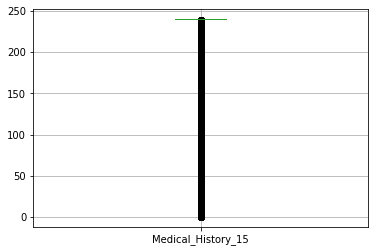

count    59381.000000
mean       211.058184
std         70.306279
min          0.000000
25%        240.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: Medical_History_15, dtype: float64
Skewness:  -2.2336231716077557


Column:  Medical_History_16


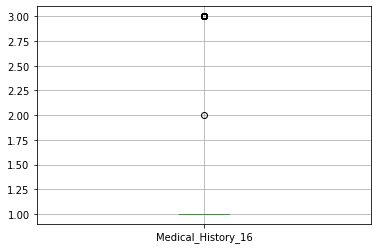

count    59381.000000
mean         1.327529
std          0.740118
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_16, dtype: float64
Skewness:  1.81723185034176


Column:  Medical_History_17


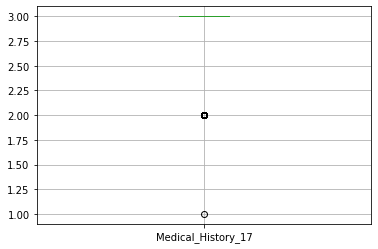

count    59381.000000
mean         2.978006
std          0.146778
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_17, dtype: float64
Skewness:  -6.53459683194376


Column:  Medical_History_18


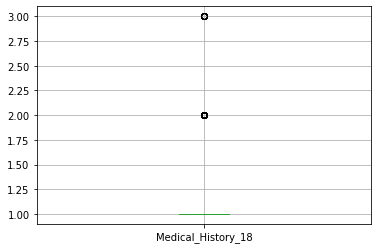

count    59381.000000
mean         1.053536
std          0.225848
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_18, dtype: float64
Skewness:  4.010719068124582


Column:  Medical_History_19


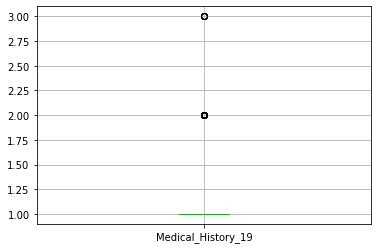

count    59381.000000
mean         1.034455
std          0.182859
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_19, dtype: float64
Skewness:  5.1461644894478935


Column:  Medical_History_20


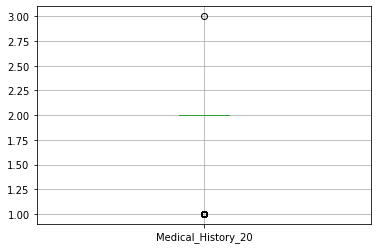

count    59381.000000
mean         1.985079
std          0.121375
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_20, dtype: float64
Skewness:  -7.974217289980639


Column:  Medical_History_21


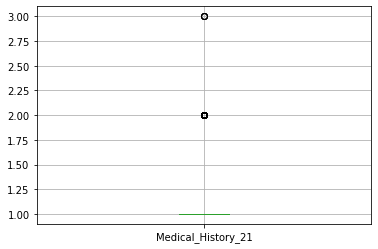

count    59381.000000
mean         1.108991
std          0.311847
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_21, dtype: float64
Skewness:  2.5161846527968295


Column:  Medical_History_22


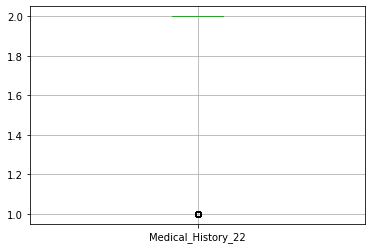

count    59381.000000
mean         1.981644
std          0.134236
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_22, dtype: float64
Skewness:  -7.176300072286352


Column:  Medical_History_23


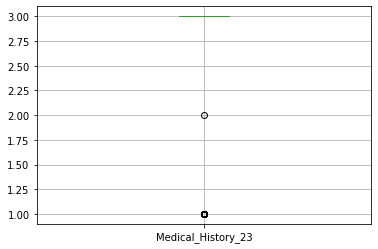

count    59381.000000
mean         2.528115
std          0.849170
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_23, dtype: float64
Skewness:  -1.2438655069271336


Column:  Medical_History_24


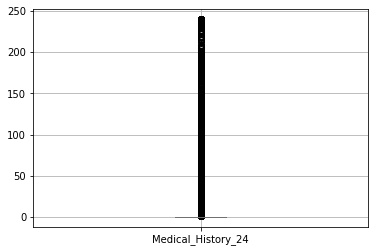

count    59381.000000
mean         3.241205
std         23.333461
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        240.000000
Name: Medical_History_24, dtype: float64
Skewness:  8.650871989989371


Column:  Medical_History_25


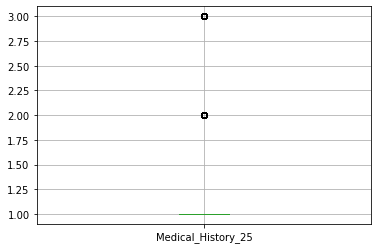

count    59381.000000
mean         1.194961
std          0.406082
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_25, dtype: float64
Skewness:  1.7166689684627388


Column:  Medical_History_26


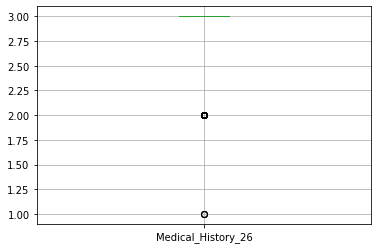

count    59381.000000
mean         2.808979
std          0.393237
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_26, dtype: float64
Skewness:  -1.5745245542775128


Column:  Medical_History_27


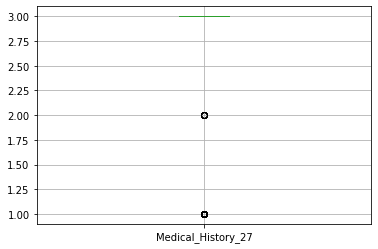

count    59381.000000
mean         2.980213
std          0.197652
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_27, dtype: float64
Skewness:  -9.903954841249414


Column:  Medical_History_28


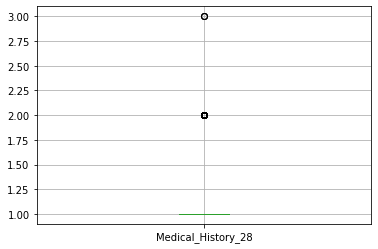

count    59381.000000
mean         1.067210
std          0.250589
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_28, dtype: float64
Skewness:  3.466706263813059


Column:  Medical_History_29


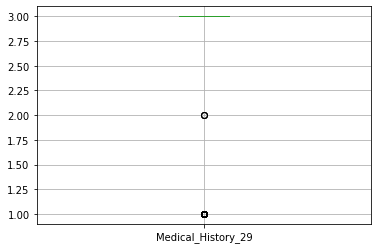

count    59381.000000
mean         2.542699
std          0.839904
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_29, dtype: float64
Skewness:  -1.2922844971581418


Column:  Medical_History_30


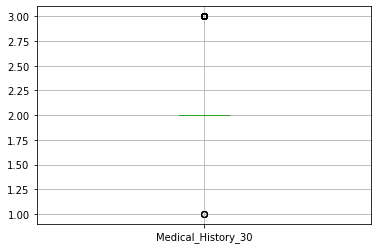

count    59381.000000
mean         2.040771
std          0.198100
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_30, dtype: float64
Skewness:  4.618449514609161


Column:  Medical_History_31


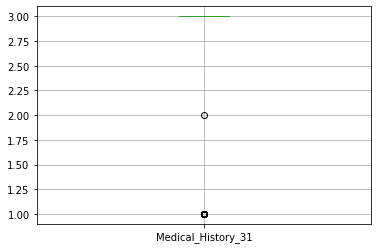

count    59381.000000
mean         2.985265
std          0.170989
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_31, dtype: float64
Skewness:  -11.521375594656496


Column:  Medical_History_32


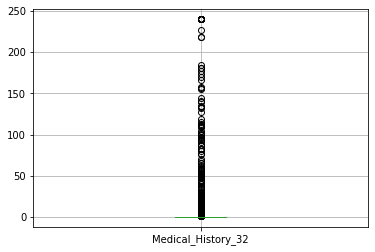

count    59381.000000
mean         0.223068
std          5.526499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        240.000000
Name: Medical_History_32, dtype: float64
Skewness:  33.7735765626507


Column:  Medical_History_33


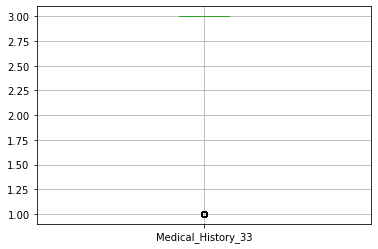

count    59381.000000
mean         2.804618
std          0.593798
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_33, dtype: float64
Skewness:  -2.710161922809635


Column:  Medical_History_34


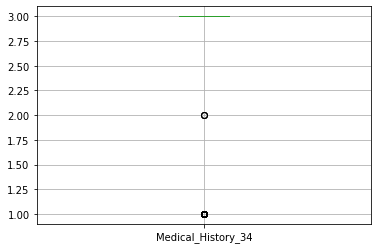

count    59381.000000
mean         2.689076
std          0.724661
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_34, dtype: float64
Skewness:  -1.9017609545070016


Column:  Medical_History_35


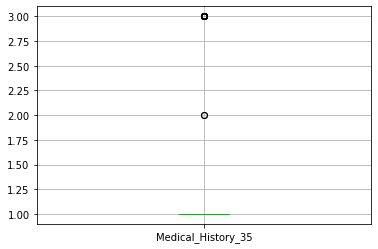

count    59381.000000
mean         1.002055
std          0.063806
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_35, dtype: float64
Skewness:  31.152197268619222


Column:  Medical_History_36


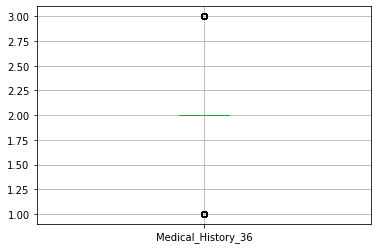

count    59381.000000
mean         2.179468
std          0.412633
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_36, dtype: float64
Skewness:  1.1674384099363653


Column:  Medical_History_37


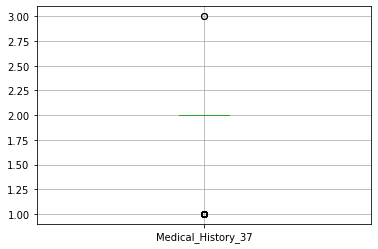

count    59381.000000
mean         1.938398
std          0.240574
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_37, dtype: float64
Skewness:  -3.6395894620489146


Column:  Medical_History_38


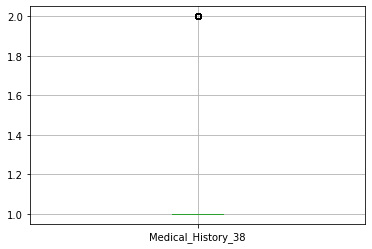

count    59381.000000
mean         1.004850
std          0.069474
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Medical_History_38, dtype: float64
Skewness:  14.254794535936009


Column:  Medical_History_39


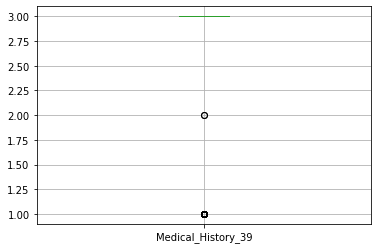

count    59381.000000
mean         2.830720
std          0.556665
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_39, dtype: float64
Skewness:  -2.9845735660152726


Column:  Medical_History_40


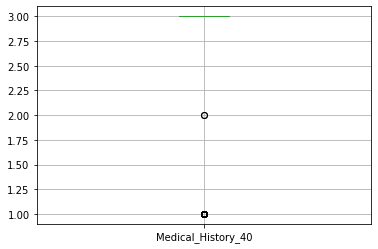

count    59381.000000
mean         2.967599
std          0.252427
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_40, dtype: float64
Skewness:  -7.664596145149692


Column:  Medical_History_41


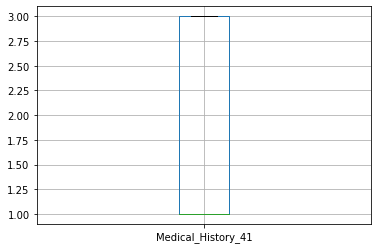

count    59381.000000
mean         1.641064
std          0.933361
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Medical_History_41, dtype: float64
Skewness:  0.7691451197703993


Column:  Medical_Keyword_1


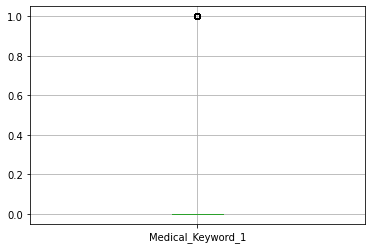

count    59381.000000
mean         0.042000
std          0.200591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_1, dtype: float64
Skewness:  4.5666659378491845


Column:  Medical_Keyword_2


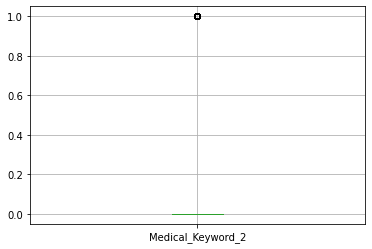

count    59381.000000
mean         0.008942
std          0.094141
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_2, dtype: float64
Skewness:  10.432791909731312


Column:  Medical_Keyword_3


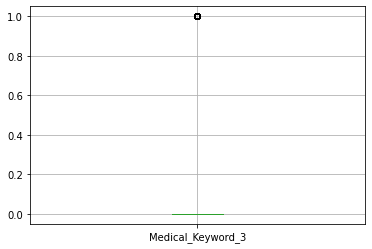

count    59381.000000
mean         0.049275
std          0.216443
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_3, dtype: float64
Skewness:  4.164968625110455


Column:  Medical_Keyword_4


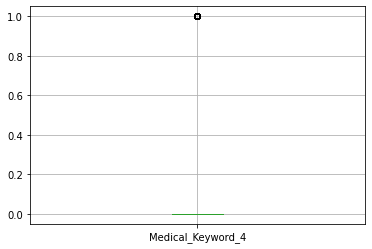

count    59381.000000
mean         0.014550
std          0.119744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_4, dtype: float64
Skewness:  8.108396620359576


Column:  Medical_Keyword_5


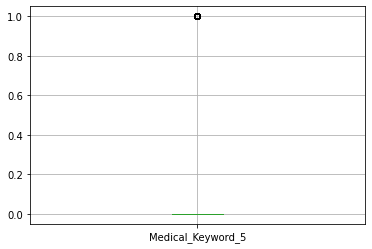

count    59381.000000
mean         0.008622
std          0.092456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_5, dtype: float64
Skewness:  10.629812858612603


Column:  Medical_Keyword_6


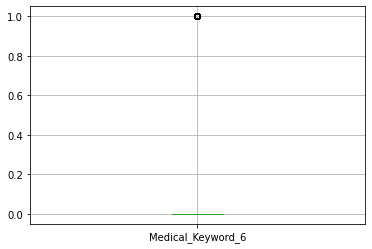

count    59381.000000
mean         0.012597
std          0.111526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_6, dtype: float64
Skewness:  8.74087987028413


Column:  Medical_Keyword_7


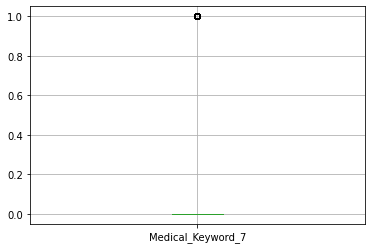

count    59381.000000
mean         0.013910
std          0.117119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_7, dtype: float64
Skewness:  8.301049221080795


Column:  Medical_Keyword_8


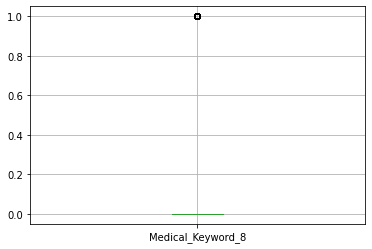

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_8, dtype: float64
Skewness:  9.648884955654573


Column:  Medical_Keyword_9


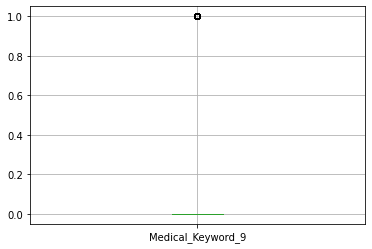

count    59381.000000
mean         0.006652
std          0.081289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_9, dtype: float64
Skewness:  12.138607256170813


Column:  Medical_Keyword_10


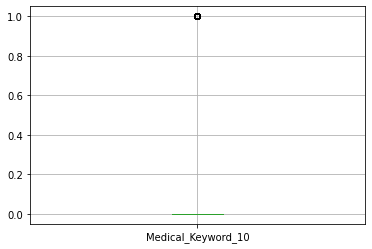

count    59381.000000
mean         0.036459
std          0.187432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_10, dtype: float64
Skewness:  4.9463914904411315


Column:  Medical_Keyword_11


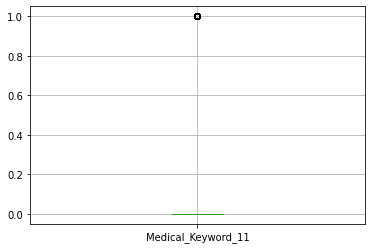

count    59381.000000
mean         0.058015
std          0.233774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_11, dtype: float64
Skewness:  3.7814250849496482


Column:  Medical_Keyword_12


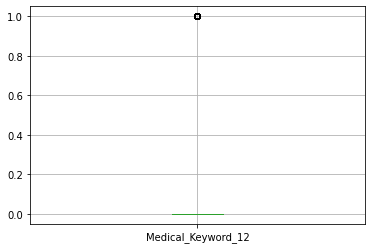

count    59381.000000
mean         0.010003
std          0.099515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_12, dtype: float64
Skewness:  9.847995603913516


Column:  Medical_Keyword_13


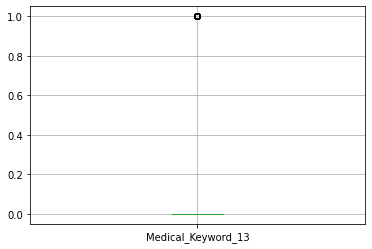

count    59381.000000
mean         0.005962
std          0.076981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_13, dtype: float64
Skewness:  12.835780412504183


Column:  Medical_Keyword_14


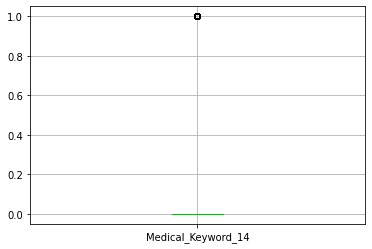

count    59381.000000
mean         0.007848
std          0.088239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_14, dtype: float64
Skewness:  11.155323178356184


Column:  Medical_Keyword_15


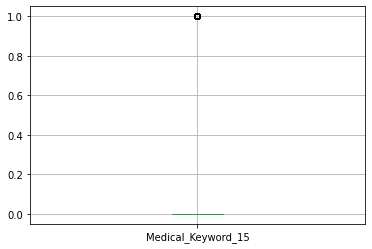

count    59381.000000
mean         0.190465
std          0.392671
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_15, dtype: float64
Skewness:  1.5766141021995717


Column:  Medical_Keyword_16


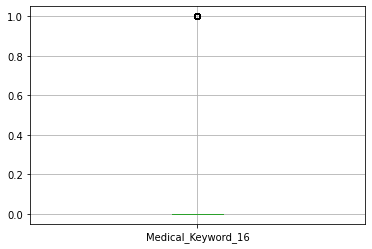

count    59381.000000
mean         0.012715
std          0.112040
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_16, dtype: float64
Skewness:  8.698679907869543


Column:  Medical_Keyword_17


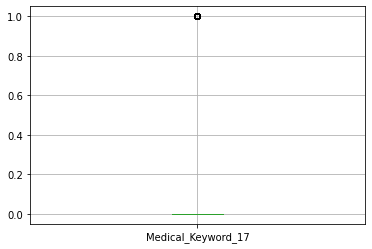

count    59381.000000
mean         0.009161
std          0.095275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_17, dtype: float64
Skewness:  10.303924482105579


Column:  Medical_Keyword_18


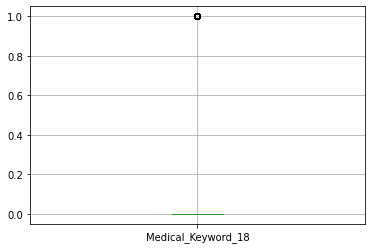

count    59381.000000
mean         0.007494
std          0.086244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_18, dtype: float64
Skewness:  11.421671974293576


Column:  Medical_Keyword_19


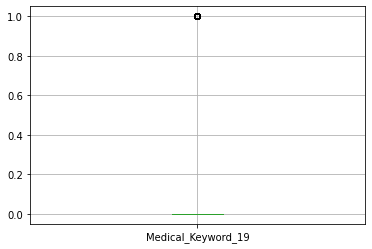

count    59381.000000
mean         0.009296
std          0.095967
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_19, dtype: float64
Skewness:  10.226873540823748


Column:  Medical_Keyword_20


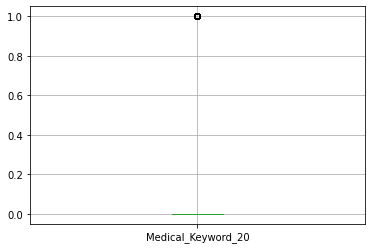

count    59381.000000
mean         0.008134
std          0.089821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_20, dtype: float64
Skewness:  10.95245588470808


Column:  Medical_Keyword_21


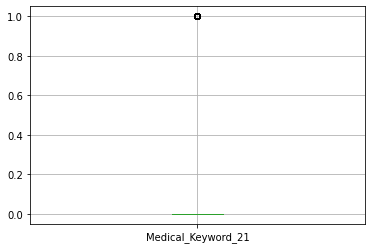

count    59381.000000
mean         0.014601
std          0.119949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_21, dtype: float64
Skewness:  8.093721182897697


Column:  Medical_Keyword_22


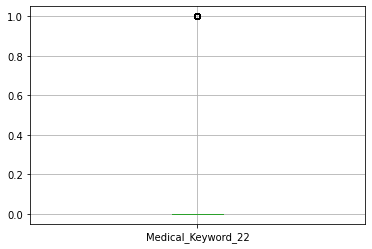

count    59381.000000
mean         0.037167
std          0.189172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_22, dtype: float64
Skewness:  4.893420647372886


Column:  Medical_Keyword_23


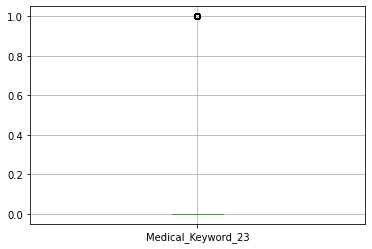

count    59381.000000
mean         0.097775
std          0.297013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_23, dtype: float64
Skewness:  2.7085541029554148


Column:  Medical_Keyword_24


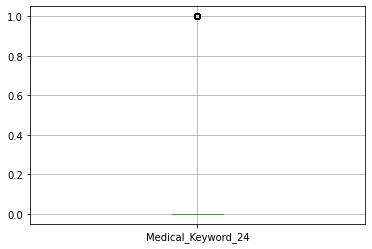

count    59381.000000
mean         0.018895
std          0.136155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_24, dtype: float64
Skewness:  7.067250142075075


Column:  Medical_Keyword_25


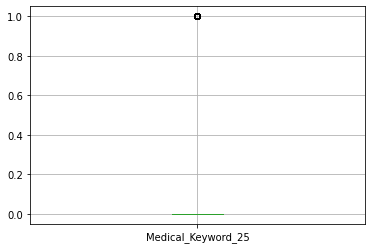

count    59381.000000
mean         0.089456
std          0.285404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_25, dtype: float64
Skewness:  2.877032346250007


Column:  Medical_Keyword_26


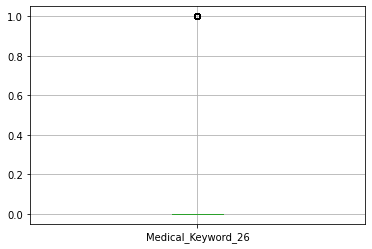

count    59381.000000
mean         0.013439
std          0.115145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_26, dtype: float64
Skewness:  8.45159813798485


Column:  Medical_Keyword_27


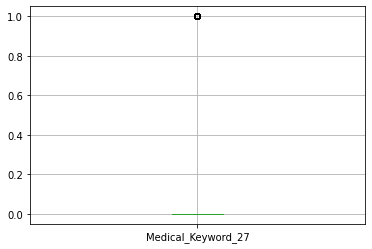

count    59381.000000
mean         0.011856
std          0.108237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_27, dtype: float64
Skewness:  9.020206197261881


Column:  Medical_Keyword_28


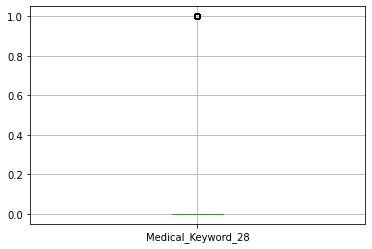

count    59381.000000
mean         0.014937
std          0.121304
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_28, dtype: float64
Skewness:  7.997767218968926


Column:  Medical_Keyword_29


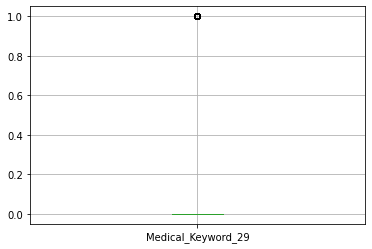

count    59381.000000
mean         0.011755
std          0.107780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_29, dtype: float64
Skewness:  9.06030394281217


Column:  Medical_Keyword_30


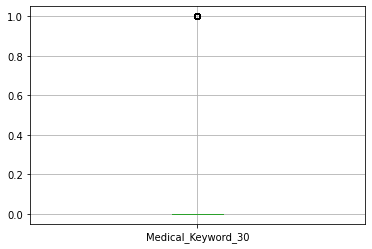

count    59381.000000
mean         0.025042
std          0.156253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_30, dtype: float64
Skewness:  6.079553863105806


Column:  Medical_Keyword_31


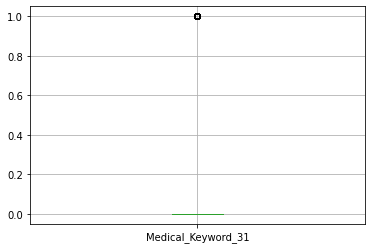

count    59381.000000
mean         0.010896
std          0.103813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_31, dtype: float64
Skewness:  9.423082385969868


Column:  Medical_Keyword_32


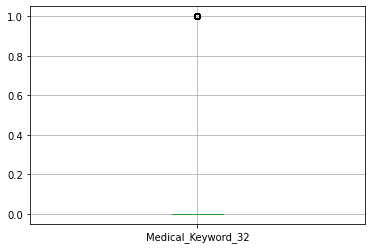

count    59381.000000
mean         0.021168
std          0.143947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_32, dtype: float64
Skewness:  6.653128363192594


Column:  Medical_Keyword_33


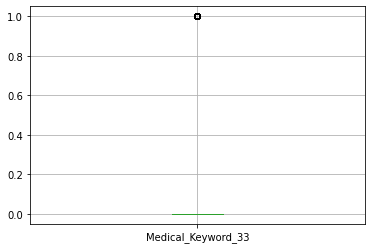

count    59381.000000
mean         0.022836
std          0.149380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_33, dtype: float64
Skewness:  6.388797169381426


Column:  Medical_Keyword_34


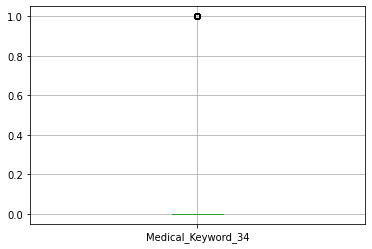

count    59381.000000
mean         0.020646
std          0.142198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_34, dtype: float64
Skewness:  6.742264109637791


Column:  Medical_Keyword_35


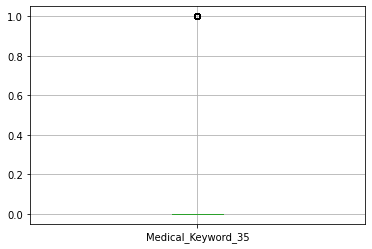

count    59381.000000
mean         0.006938
std          0.083007
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_35, dtype: float64
Skewness:  11.88035176926597


Column:  Medical_Keyword_36


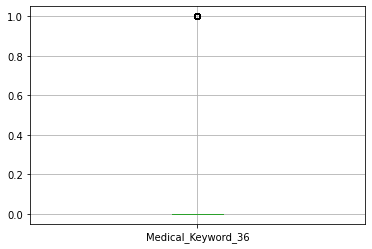

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_36, dtype: float64
Skewness:  9.64888495565458


Column:  Medical_Keyword_37


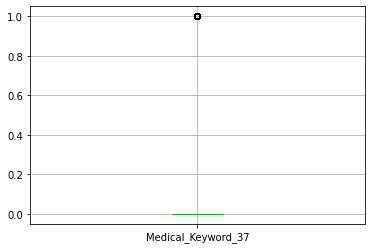

count    59381.000000
mean         0.066587
std          0.249307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_37, dtype: float64
Skewness:  3.4770539781416776


Column:  Medical_Keyword_38


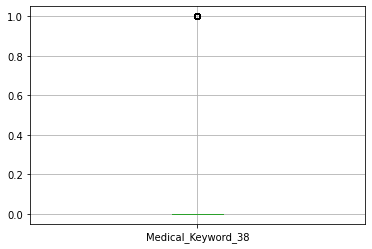

count    59381.000000
mean         0.006837
std          0.082405
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_38, dtype: float64
Skewness:  11.969659278126407


Column:  Medical_Keyword_39


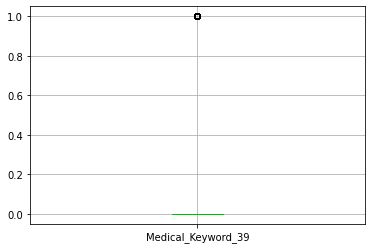

count    59381.000000
mean         0.013658
std          0.116066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_39, dtype: float64
Skewness:  8.38074443186075


Column:  Medical_Keyword_40


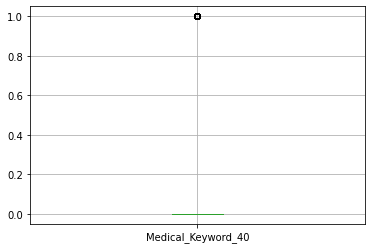

count    59381.000000
mean         0.056954
std          0.231757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_40, dtype: float64
Skewness:  3.82349138600412


Column:  Medical_Keyword_41


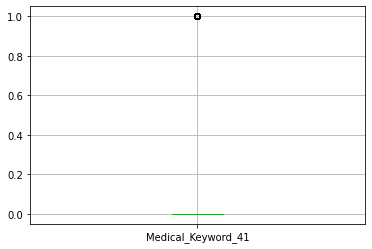

count    59381.000000
mean         0.010054
std          0.099764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_41, dtype: float64
Skewness:  9.822458539501673


Column:  Medical_Keyword_42


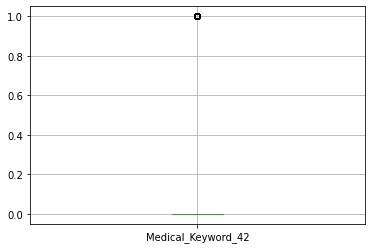

count    59381.000000
mean         0.045536
std          0.208479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_42, dtype: float64
Skewness:  4.35994246504929


Column:  Medical_Keyword_43


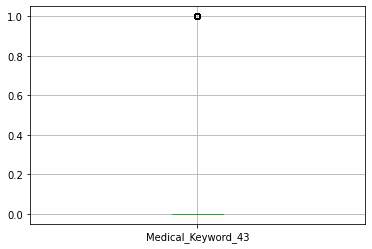

count    59381.000000
mean         0.010710
std          0.102937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_43, dtype: float64
Skewness:  9.506931409455676


Column:  Medical_Keyword_44


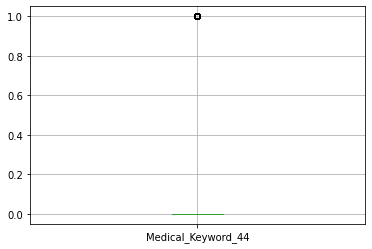

count    59381.000000
mean         0.007528
std          0.086436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_44, dtype: float64
Skewness:  11.395505505541607


Column:  Medical_Keyword_45


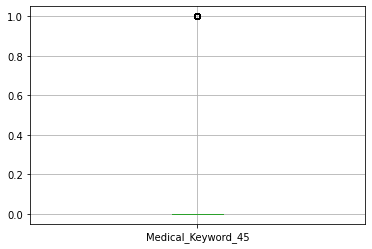

count    59381.000000
mean         0.013691
std          0.116207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_45, dtype: float64
Skewness:  8.36999289291722


Column:  Medical_Keyword_46


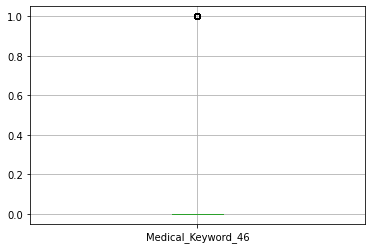

count    59381.000000
mean         0.008488
std          0.091737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_46, dtype: float64
Skewness:  10.716053666043818


Column:  Medical_Keyword_47


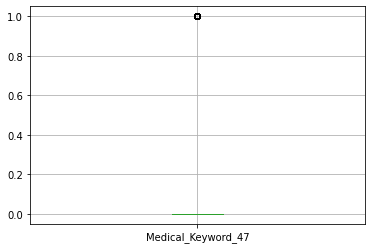

count    59381.000000
mean         0.019905
std          0.139676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_47, dtype: float64
Skewness:  6.874622165948636


Column:  Medical_Keyword_48


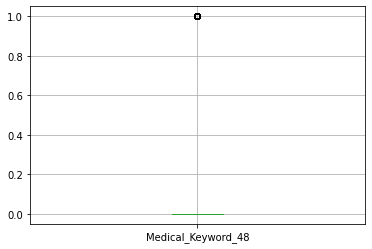

count    59381.000000
mean         0.054496
std          0.226995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_48, dtype: float64
Skewness:  3.9253711340486674




In [19]:
for column in columns:
    dataset.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset[column].describe())
    print('Skewness: ', dataset[column].skew())
    print('\n')

-------------------------------------------
Column:  Product_Info_6


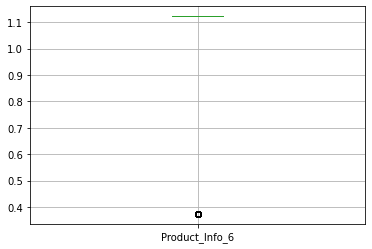

count    56018.000000
mean         1.000000
std          0.276601
min          0.374077
25%          1.122230
50%          1.122230
75%          1.122230
max          1.122230
Name: Product_Info_6, dtype: float64
Skewness:  -1.8210726684138985


Column:  Employment_Info_2


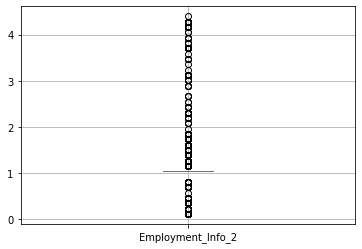

count    56018.000000
mean         1.000000
std          0.488458
min          0.115666
25%          1.040990
50%          1.040990
75%          1.040990
max          4.395292
Name: Employment_Info_2, dtype: float64
Skewness:  0.5531523733700418


Column:  InsuredInfo_3


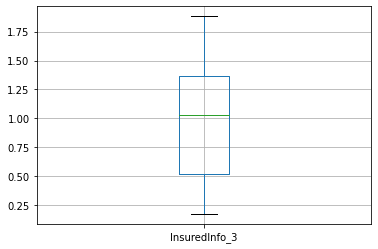

count    56018.000000
mean         1.000000
std          0.457561
min          0.171205
25%          0.513614
50%          1.027228
75%          1.369637
max          1.883251
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10575000237291188


Column:  Insurance_History_3


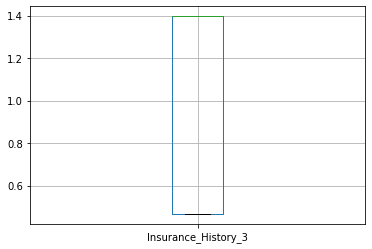

count    56018.000000
mean         1.000000
std          0.460644
min          0.465718
25%          0.465718
50%          1.397155
75%          1.397155
max          1.397155
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2976927084395886


Column:  Insurance_History_8


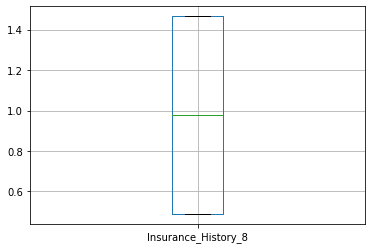

count    56018.000000
mean         1.000000
std          0.368951
min          0.488464
25%          0.488464
50%          0.976928
75%          1.465391
max          1.465391
Name: Insurance_History_8, dtype: float64
Skewness:  -0.07824095777026652


Column:  Insurance_History_9


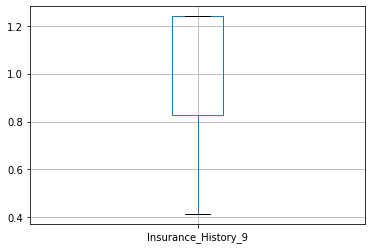

count    56018.000000
mean         1.000000
std          0.210601
min          0.413356
25%          0.826712
50%          0.826712
75%          1.240068
max          1.240068
Name: Insurance_History_9, dtype: float64
Skewness:  0.14430316848155797


Column:  Family_Hist_1


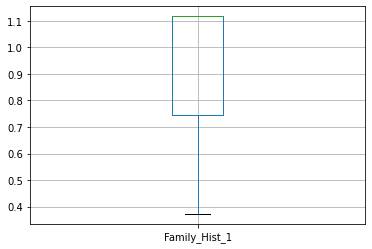

count    56018.000000
mean         1.000000
std          0.179760
min          0.372223
25%          0.744445
50%          1.116668
75%          1.116668
max          1.116668
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0426469550391384


Column:  Medical_History_1


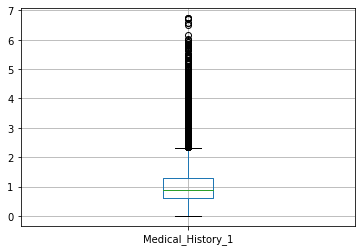

count    47641.000000
mean         1.000000
std          0.707680
min          0.000000
25%          0.614240
50%          0.868667
75%          1.303000
max          6.728664
Name: Medical_History_1, dtype: float64
Skewness:  1.5662244737248714


Column:  Medical_History_2


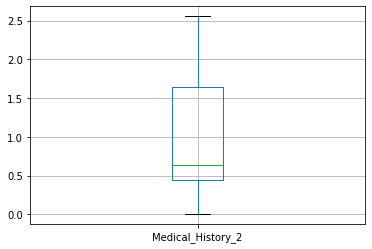

count    56018.000000
mean         1.000000
std          0.703867
min          0.003943
25%          0.441652
50%          0.638818
75%          1.640423
max          2.555274
Name: Medical_History_2, dtype: float64
Skewness:  0.5973544988810048


Column:  Medical_History_8


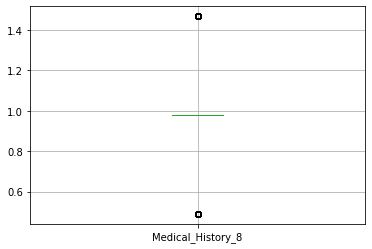

count    56018.000000
mean         1.000000
std          0.142477
min          0.489244
25%          0.978489
50%          0.978489
75%          0.978489
max          1.467733
Name: Medical_History_8, dtype: float64
Skewness:  1.3239421383209096


Column:  Medical_History_10


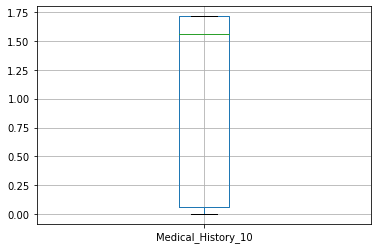

count    532.000000
mean       1.000000
std        0.770162
min        0.000000
25%        0.057128
50%        1.560316
75%        1.713849
max        1.713849
Name: Medical_History_10, dtype: float64
Skewness:  -0.2930888639646699


Column:  Medical_History_15


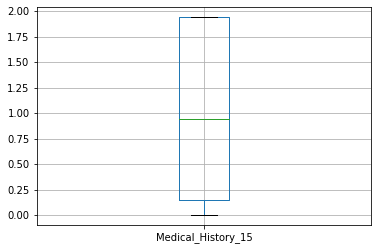

count    13961.000000
mean         1.000000
std          0.795297
min          0.000000
25%          0.145340
50%          0.944707
75%          1.937861
max          1.937861
Name: Medical_History_15, dtype: float64
Skewness:  0.015628845190256875


Column:  Medical_History_23


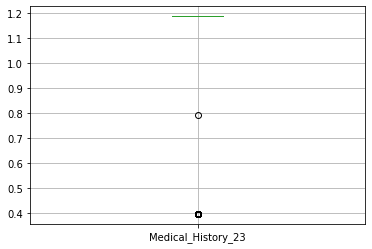

count    56018.000000
mean         1.000000
std          0.336519
min          0.395811
25%          1.187434
50%          1.187434
75%          1.187434
max          1.187434
Name: Medical_History_23, dtype: float64
Skewness:  -1.2384575972220346


Column:  Medical_History_24


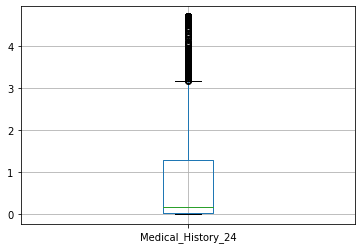

count    3582.000000
mean        1.000000
std         1.536219
min         0.000000
25%         0.019665
50%         0.157318
75%         1.278211
max         4.719549
Name: Medical_History_24, dtype: float64
Skewness:  1.546494425368965


Column:  Medical_History_26


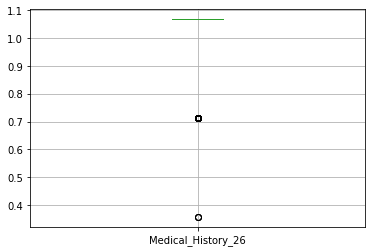

count    56018.000000
mean         1.000000
std          0.139969
min          0.355991
25%          1.067972
50%          1.067972
75%          1.067972
max          1.067972
Name: Medical_History_26, dtype: float64
Skewness:  -1.5753533855955513


Column:  Medical_History_29


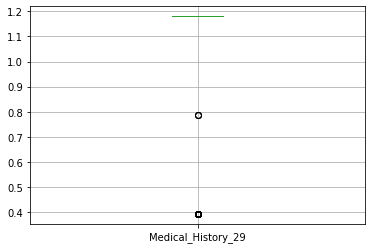

count    56018.000000
mean         1.000000
std          0.330497
min          0.393354
25%          1.180063
50%          1.180063
75%          1.180063
max          1.180063
Name: Medical_History_29, dtype: float64
Skewness:  -1.290726471134212


Column:  Medical_History_34


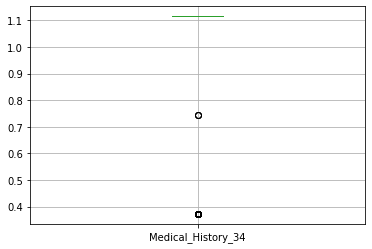

count    56018.000000
mean         1.000000
std          0.269285
min          0.371815
25%          1.115445
50%          1.115445
75%          1.115445
max          1.115445
Name: Medical_History_34, dtype: float64
Skewness:  -1.9040511817933192


Column:  Medical_History_36


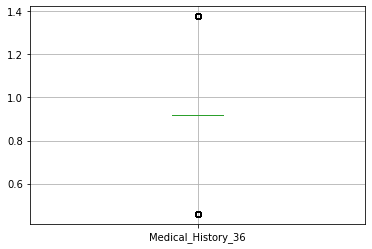

count    56018.000000
mean         1.000000
std          0.189180
min          0.458814
25%          0.917628
50%          0.917628
75%          0.917628
max          1.376443
Name: Medical_History_36, dtype: float64
Skewness:  1.1724067697658802




In [ ]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].mean() > 2:
        dataset[column] = dataset[column]/dataset[column].mean()
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

# mean transformation to reduce variance

-------------------------------------------
Column:  Product_Info_1


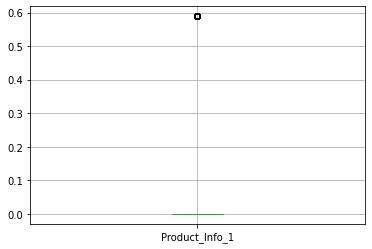

count    56019.000000
mean         0.015553
std          0.094417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.588705
Name: Product_Info_1, dtype: float64
Skewness:  5.905902143583628


Column:  Product_Info_3


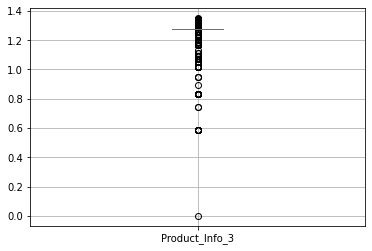

count    56019.000000
mean         1.255288
std          0.064896
min          0.000000
25%          1.276342
50%          1.276342
75%          1.276342
max          1.348626
Name: Product_Info_3, dtype: float64
Skewness:  -2.8373346242560635


Column:  Product_Info_5


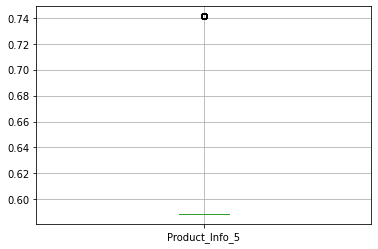

count    56018.000000
mean         0.589769
std          0.012692
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Product_Info_5, dtype: float64
Skewness:  11.84411600187766


Column:  Product_Info_7


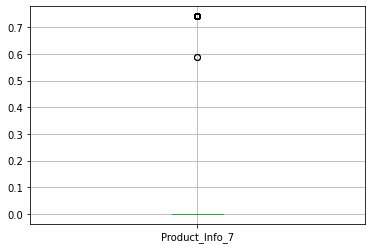

count    56018.000000
mean         0.016083
std          0.107973
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Product_Info_7, dtype: float64
Skewness:  6.565075829166244


Column:  Employment_Info_5


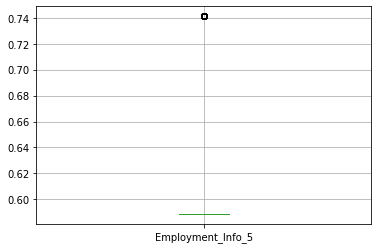

count    56018.000000
mean         0.610427
std          0.053289
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Employment_Info_5, dtype: float64
Skewness:  2.0455883567662694


Column:  InsuredInfo_2


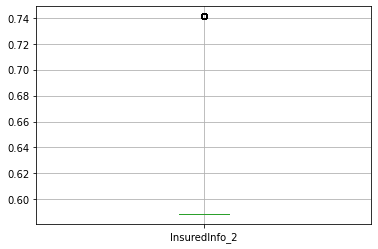

count    56018.000000
mean         0.589818
std          0.012979
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: InsuredInfo_2, dtype: float64
Skewness:  11.574880351176995


Column:  InsuredInfo_4


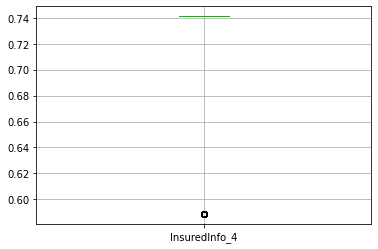

count    56018.000000
mean         0.723408
std          0.048889
min          0.588705
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.392435331245348


Column:  InsuredInfo_5


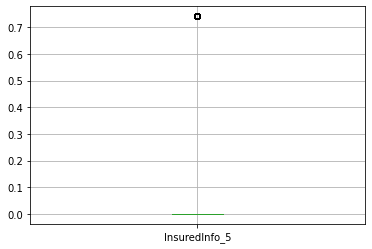

count    56018.000000
mean         0.010254
std          0.086571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: InsuredInfo_5, dtype: float64
Skewness:  8.324603923454642


Column:  InsuredInfo_7


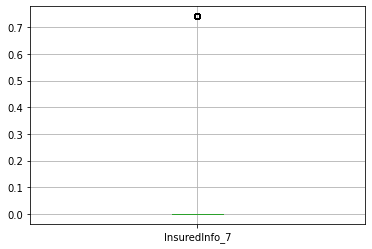

count    56018.000000
mean         0.014302
std          0.101960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: InsuredInfo_7, dtype: float64
Skewness:  6.988764508030467


Column:  Insurance_History_2


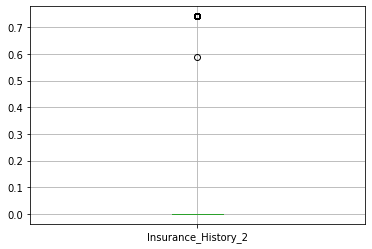

count    56018.000000
mean         0.020796
std          0.122389
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Insurance_History_2, dtype: float64
Skewness:  5.715589401695753


Column:  Medical_History_3


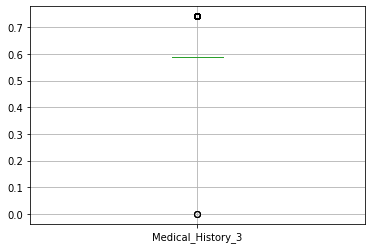

count    56018.000000
mean         0.604316
std          0.046471
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_3, dtype: float64
Skewness:  2.46799079265577


Column:  Medical_History_5


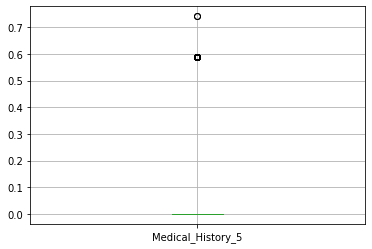

count    56018.000000
mean         0.004293
std          0.050131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_5, dtype: float64
Skewness:  11.59615625486178


Column:  Medical_History_6


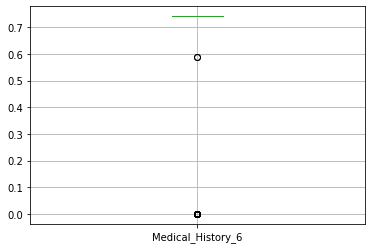

count    56018.000000
mean         0.700052
std          0.169615
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_6, dtype: float64
Skewness:  -3.8850556596846193


Column:  Medical_History_11


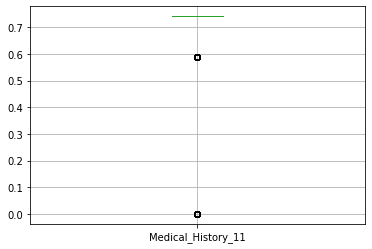

count    56018.000000
mean         0.739606
std          0.029264
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_11, dtype: float64
Skewness:  -23.495084931639706


Column:  Medical_History_12


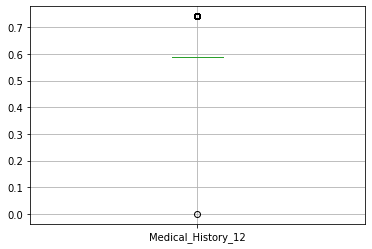

count    56018.000000
mean         0.597321
std          0.035314
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_12, dtype: float64
Skewness:  3.7233732053239645


Column:  Medical_History_13


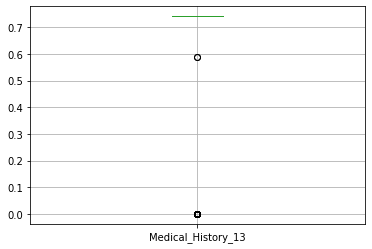

count    56018.000000
mean         0.655042
std          0.237494
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_13, dtype: float64
Skewness:  -2.395627429401883


Column:  Medical_History_14


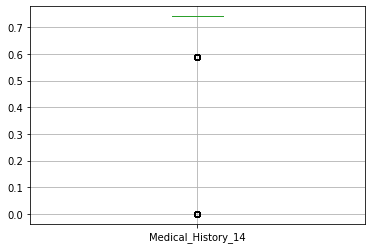

count    56018.000000
mean         0.734475
std          0.053463
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_14, dtype: float64
Skewness:  -11.661928144674613


Column:  Medical_History_17


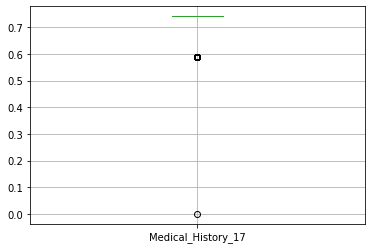

count    56018.000000
mean         0.737778
std          0.022601
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_17, dtype: float64
Skewness:  -6.944677336721788


Column:  Medical_History_18


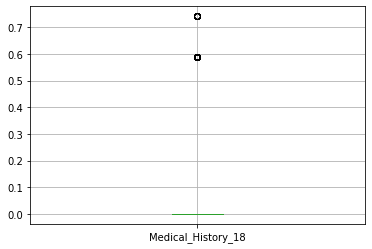

count    56018.000000
mean         0.031576
std          0.132711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_18, dtype: float64
Skewness:  3.9663859437828792


Column:  Medical_History_19


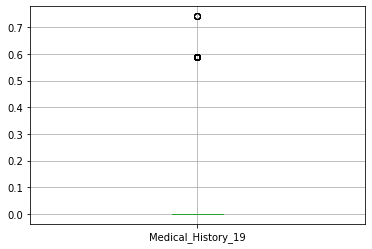

count    56018.000000
mean         0.020422
std          0.107778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_19, dtype: float64
Skewness:  5.089226959880439


Column:  Medical_History_20


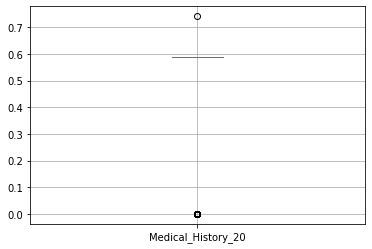

count    56018.000000
mean         0.579869
std          0.071593
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_20, dtype: float64
Skewness:  -7.975510770865947


Column:  Medical_History_21


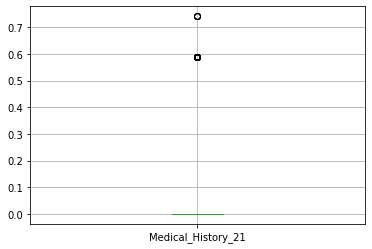

count    56018.000000
mean         0.064065
std          0.183356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_21, dtype: float64
Skewness:  2.512894397976193


Column:  Medical_History_22


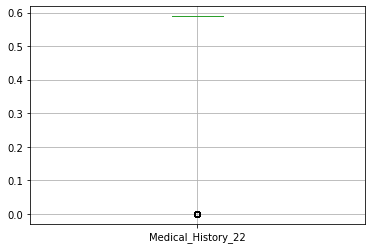

count    56018.000000
mean         0.577923
std          0.078940
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.588705
Name: Medical_History_22, dtype: float64
Skewness:  -7.184696392317714


Column:  Medical_History_27


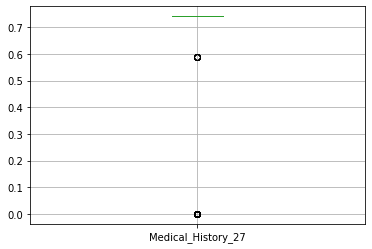

count    56018.000000
mean         0.733830
std          0.073227
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_27, dtype: float64
Skewness:  -9.917475711566288


Column:  Medical_History_28


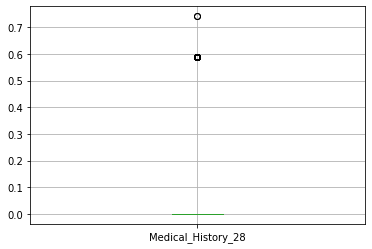

count    56018.000000
mean         0.039425
std          0.147173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_28, dtype: float64
Skewness:  3.465317727888252


Column:  Medical_History_30


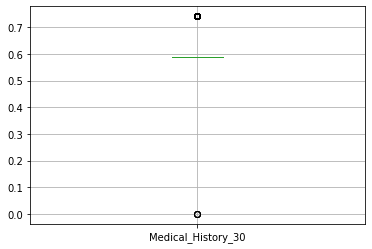

count    56018.000000
mean         0.594884
std          0.030577
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_30, dtype: float64
Skewness:  3.93329831052634


Column:  Medical_History_31


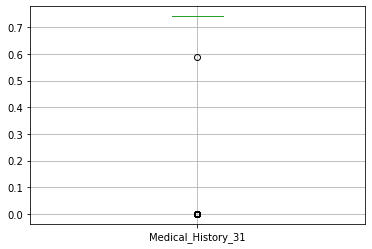

count    56018.000000
mean         0.735632
std          0.063711
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_31, dtype: float64
Skewness:  -11.459275332925827


Column:  Medical_History_33


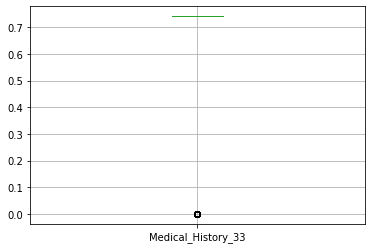

count    56018.000000
mean         0.668582
std          0.220272
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_33, dtype: float64
Skewness:  -2.7058971601509416


Column:  Medical_History_35


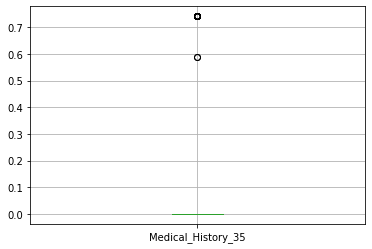

count    56018.000000
mean         0.000722
std          0.023056
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_35, dtype: float64
Skewness:  31.930661868163114


Column:  Medical_History_37


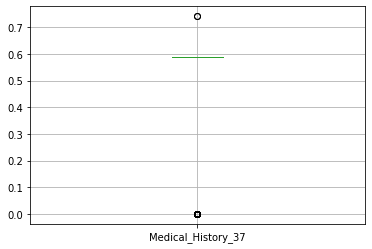

count    56018.000000
mean         0.552475
std          0.141495
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_37, dtype: float64
Skewness:  -3.648370619626093


Column:  Medical_History_38


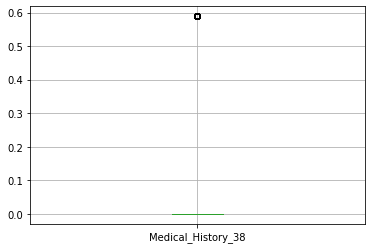

count    56018.000000
mean         0.002859
std          0.040923
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.588705
Name: Medical_History_38, dtype: float64
Skewness:  14.24655320466915


Column:  Medical_History_39


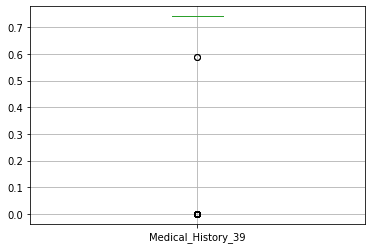

count    56018.000000
mean         0.678328
std          0.206429
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_39, dtype: float64
Skewness:  -2.981740287457698


Column:  Medical_History_40


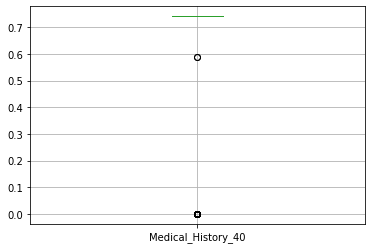

count    56018.000000
mean         0.729292
std          0.092986
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_40, dtype: float64
Skewness:  -7.7151963692288295




In [ ]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].skew() > 2 or dataset[column].skew() < -2:
        dataset[column] = np.sqrt(dataset[column])
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

In [21]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

categorical_data = pd.concat([dataset[CATEGORICAL_COLUMNS], testset[CATEGORICAL_COLUMNS]])
continuous_data = pd.concat([dataset[CONTINUOUS_COLUMNS], testset[CONTINUOUS_COLUMNS]])
discrete_data = pd.concat([dataset[DISCRETE_COLUMNS], testset[DISCRETE_COLUMNS]])
dummy_data = pd.concat([dataset[DUMMY_COLUMNS], testset[DUMMY_COLUMNS]])

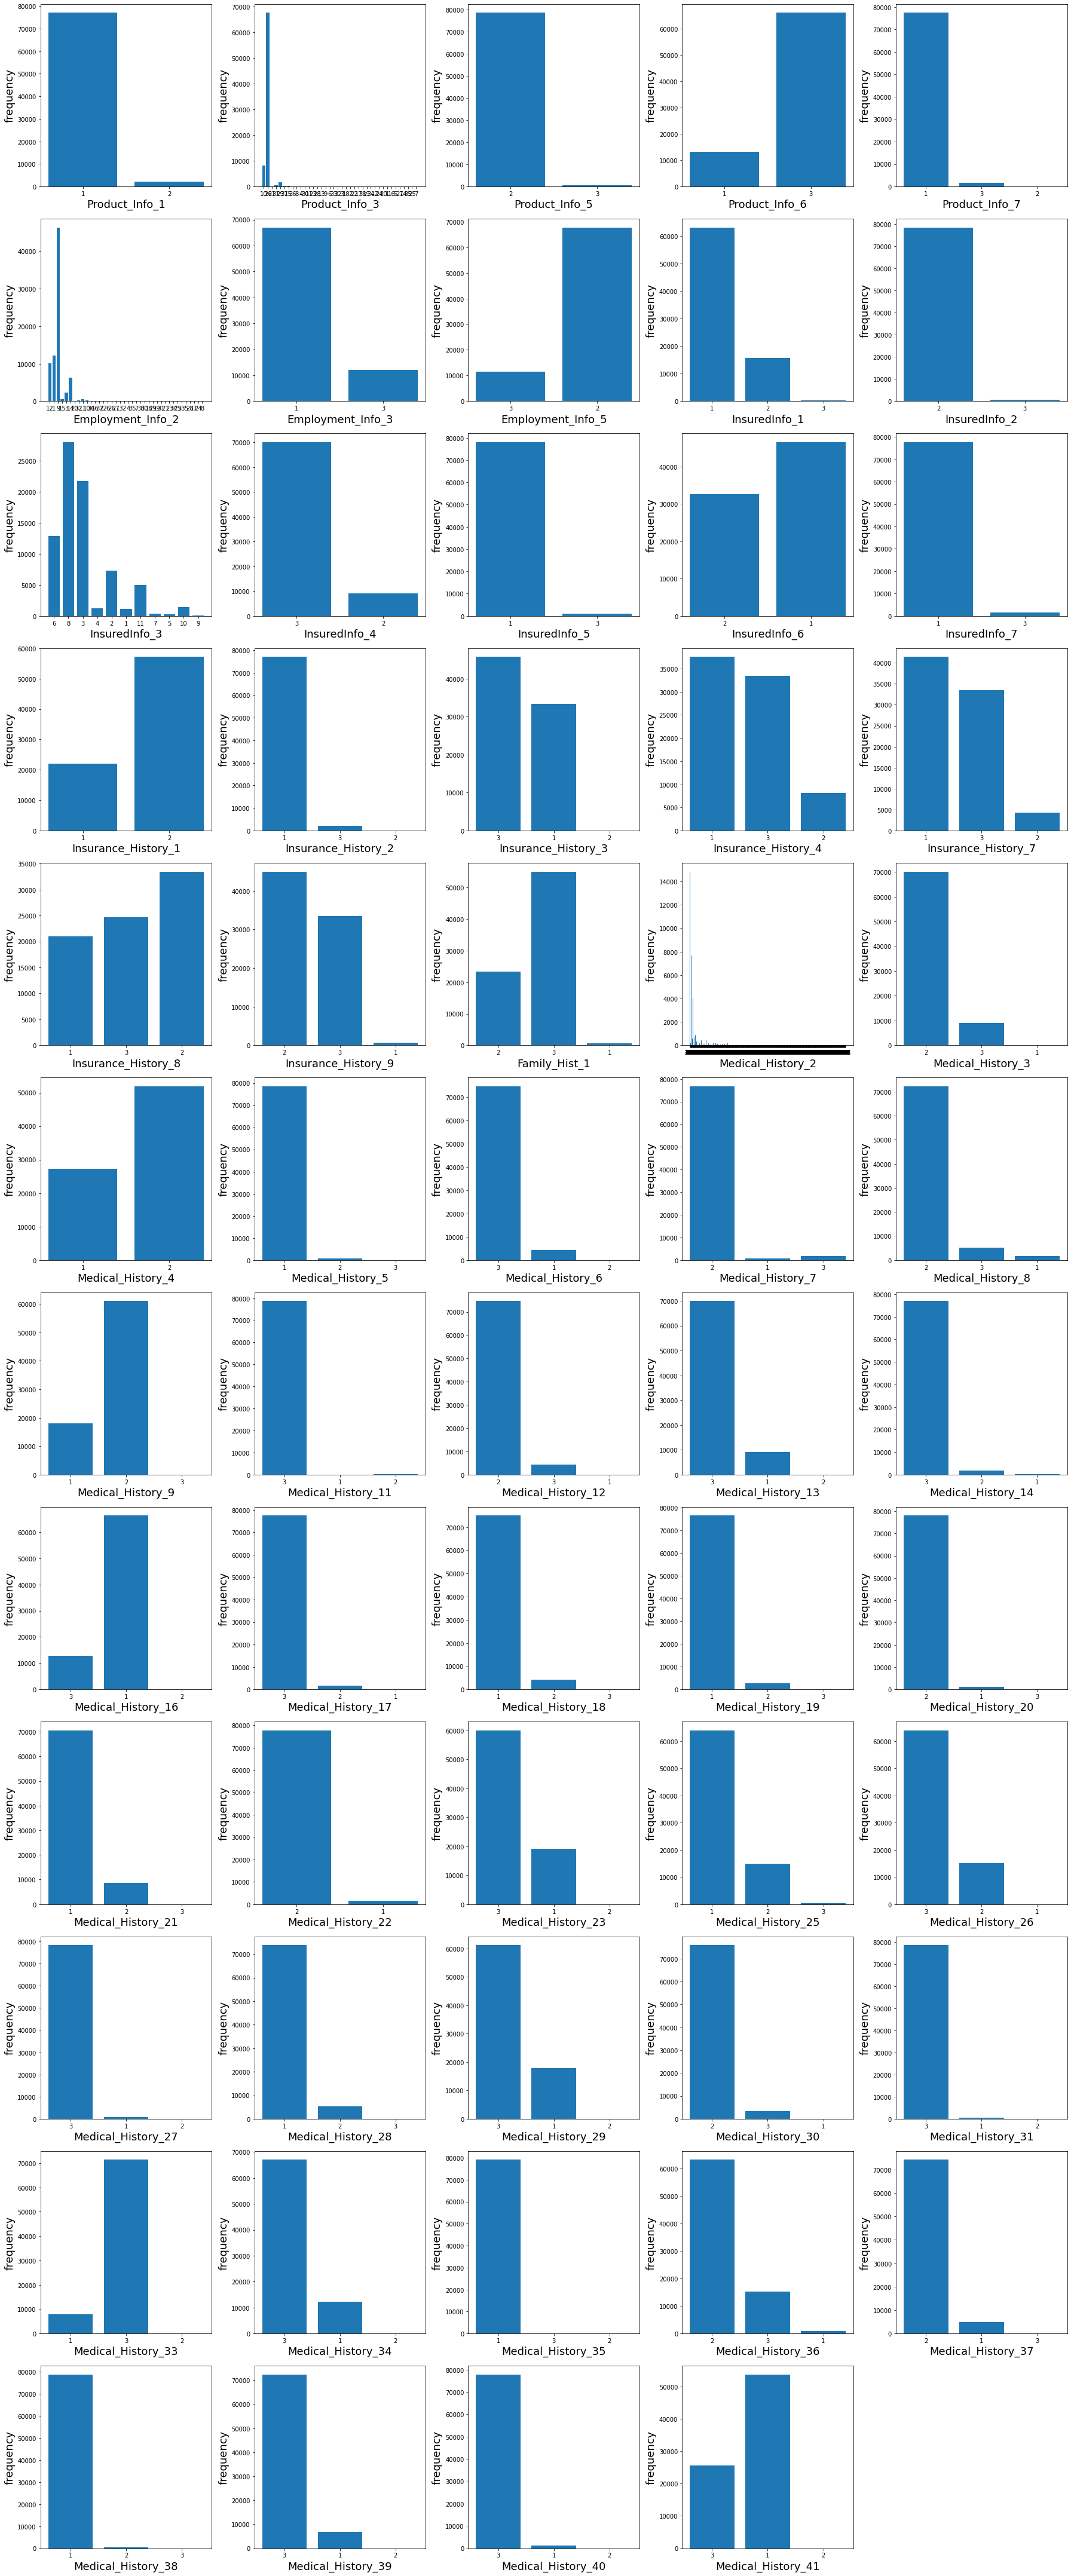

In [22]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

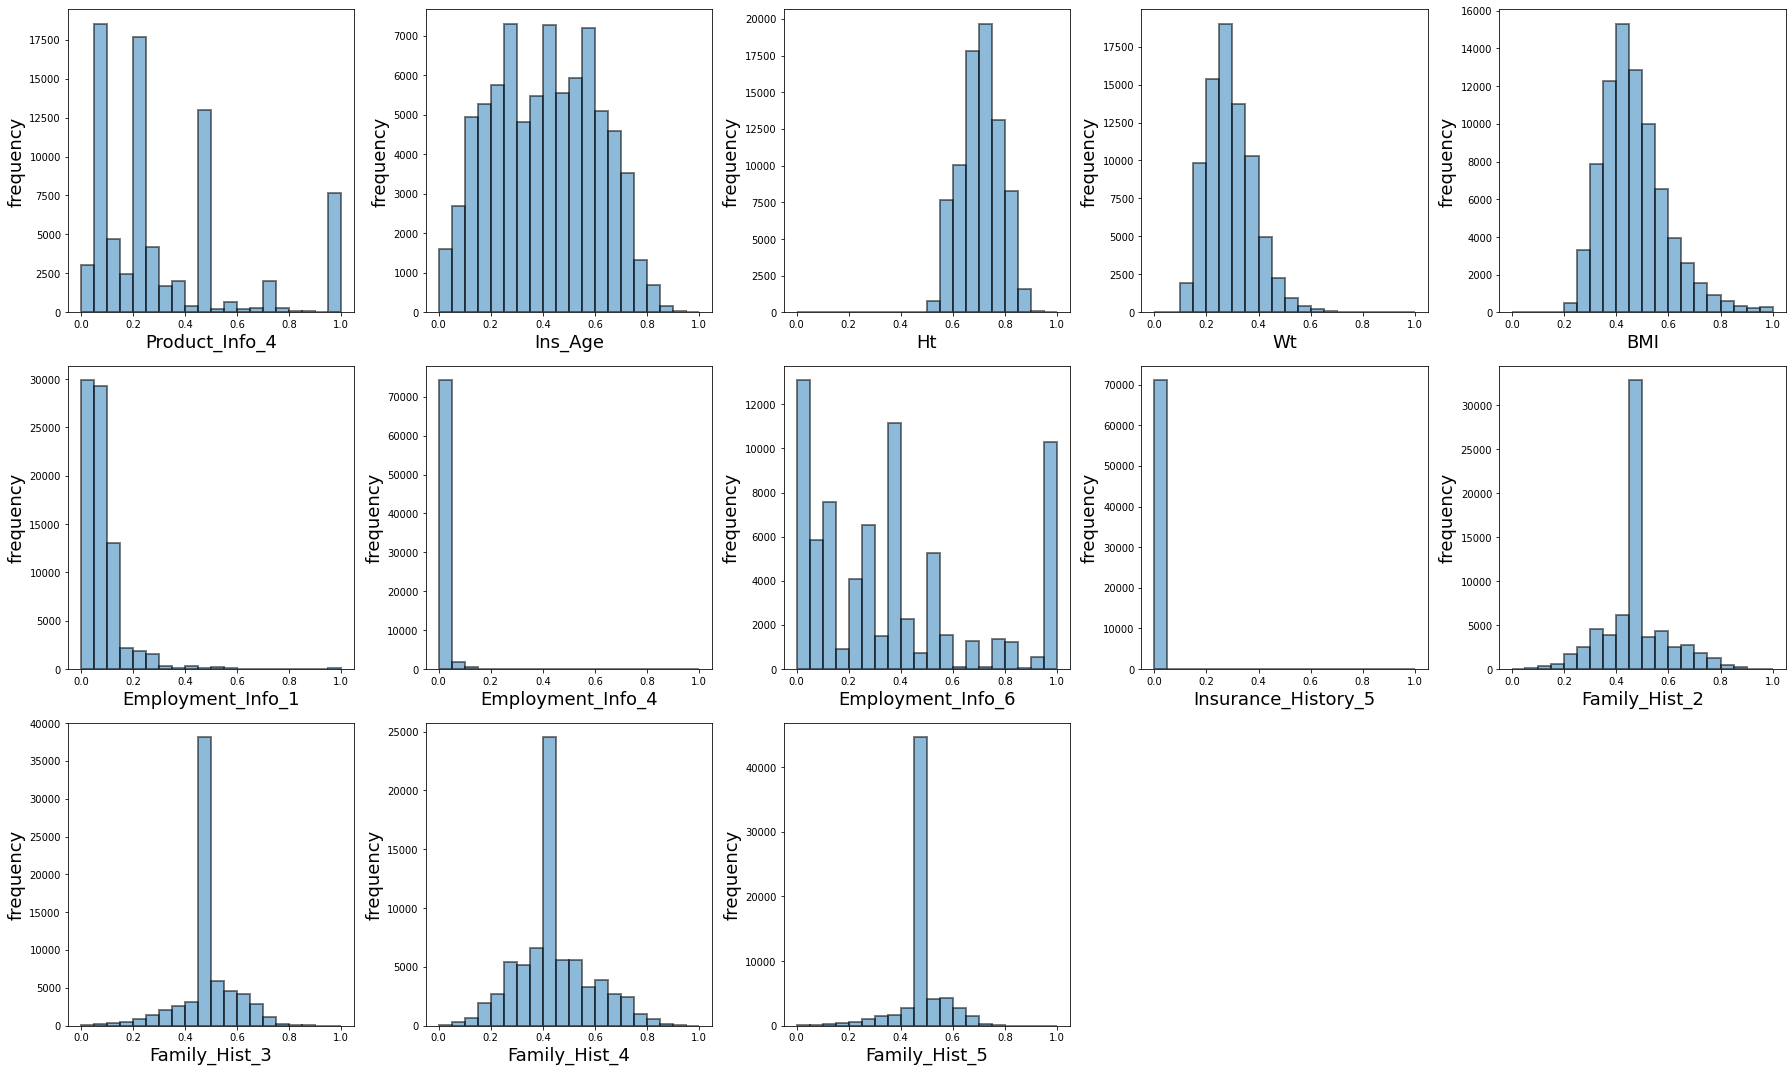

In [23]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

In [24]:
dataset

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,8
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,4
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,8
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,8
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,0,0,0,0,4
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,0,0,7
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,8
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,1,0,0,0,0,0,0,0,0,8


In [25]:

X = dataset.drop(["Response"],axis = 1)

y = dataset['Response']

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 36.70428075404303
0.5 : 36.70479432626298
0.75 : 36.70493644832851
1.0 : 36.70487289987086
1.25 : 36.70469054946784
1.5 : 36.70443950932254
1.75 : 36.704150251279835
2.0 : 36.70384186696574


In [43]:
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.3607571418374943


In [44]:

# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 14.17347424028342
0.5 : 9.610757558460584
0.75 : 7.222464328703661
1.0 : 6.991495745408962
1.25 : 6.911024683801618
1.5 : 6.814221133211702
1.75 : 6.718148996755334
2.0 : 6.612578780149704


In [46]:

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 0.25, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.13596375795694038


In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
# training the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 49.86%


Text(0.5, 1.0, 'Confusion Matrix')

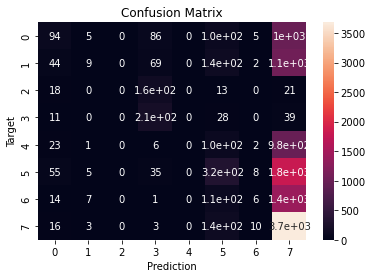

In [30]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')